**Lab2-DL: F2-TabPFN-neuro.ipynb** (ELMED219) | Prioritet: 4 (avansert)

# 🧠 TabPFN i nevrovitenskap: Håndskriftanalyse for demensdiagnostikk

_Fra penn og papir til maskinlæring – en kostnadseffektiv tilnærming til tidlig demensdeteksjon_

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab2-DL/notebooks/F2-TabPFN-neuro.ipynb)


Sist oppdatert: 2025-12-05, A. Lundervold

Bruk `elmed219-2026` conda-miljøet eller Google Colab

**Denne notebooken bruker TabPFN v2.5** – den nyeste versjonen med støtte for opptil 50 000 rader og 2 000 features.

> 📚 **Læringsmål:** Etter å ha fullført denne notebooken skal du kunne:
> - Forstå hvordan håndskriftanalyse kan brukes til demensscreening
> - Anvende TabPFN på DARWIN-datasettet for Alzheimers-klassifikasjon
> - Sammenligne ytelsen til ulike maskinlæringsmodeller
> - Diskutere fordeler og utfordringer med digitale biomarkører
> - Reflektere over fremtidens diagnostiske muligheter

---

## 🏥 Klinisk kontekst: Demens og tidlig diagnostikk

### Demens – en voksende folkehelseutfordring

> **Visste du?**
> - Over 100 000 nordmenn lever med demens i dag
> - Alzheimers sykdom utgjør 60-70% av alle demenstilfeller
> - Tidlig diagnose kan gi 2-3 år ekstra med god livskvalitet gjennom tidlig intervensjon
> - Kostnadene for demensomsorgen i Norge overstiger 40 milliarder kroner årlig

### Dagens diagnostiske utfordringer

| Utfordring | Konsekvens |
|------------|------------|
| **Sen diagnose** | Mange får diagnose først når sykdommen er moderat til alvorlig |
| **Kostbare undersøkelser** | MR/CT (~5000-10000 NOK), PET (~15000 NOK), spinalvæskeprøve (invasiv) |
| **Tilgjengelighet** | Lange ventelister, spesielt i distriktene |
| **Subjektive vurderinger** | Kognitive tester er avhengige av testerens erfaring |

### Håndskriftanalyse som biomarkør

**Hvorfor håndskrift?**

Håndskrift er en kompleks kognitiv-motorisk oppgave som involverer:
- **Planlegging** (prefrontal cortex)
- **Finmotorikk** (motorisk cortex, basalganglier)
- **Visuospatial prosessering** (parietallappen)
- **Hukommelse** (hippocampus – spesielt rammet ved Alzheimers)

> 💡 **Klinisk innsikt:** Endringer i håndskrift (mikrografi, tremor, pause-mønstre) kan oppstå **år før** klinisk demensdiagnose!

### Fordeler med håndskriftbasert screening

| Aspekt | Håndskriftanalyse | Tradisjonell imaging |
|--------|-------------------|---------------------|
| **Kostnad** | ~100 NOK (penn + papir + algoritme) | 5000-15000 NOK |
| **Tilgjengelighet** | Legekontor, sykehjem, hjemme | Sykehus med spesialutstyr |
| **Invasivitet** | Ingen | Varierer (stråling, kontrast, spinalvæske) |
| **Tid** | 5-10 minutter | Timer til dager |
| **Skalerbarhet** | Massescreening mulig | Begrenset kapasitet |

### TabPFN for medisinsk diagnostikk

TabPFN v2.5 er ideelt for denne typen medisinsk forskning fordi:
- **Små datasett**: DARWIN har bare 174 pasienter – perfekt for TabPFN
- **Mange variabler**: 451 håndskriftfeatures – godt innenfor TabPFNs kapasitet (2000 features)
- **Usikkerhetsestimater**: Viktig for klinisk beslutningsstøtte
- **Rask utvikling**: Ingen hyperparametertuning = raskere fra forskning til klinikk



### 🔬 TabPFN: Teknisk bakgrunn (valgfritt)

> ⚠️ **For den interesserte:** Denne seksjonen er valgfri – du kan hoppe til den praktiske delen nedenfor.

#### Hvorfor har dyp læring slitt med tabelldata?

Tradisjonelt har nevrale nettverk underprestert på tabulære data sammenlignet med tre-baserte metoder (XGBoost, Random Forest). Årsaker:
- Tabulære data har heterogene features (ulike skalaer, kategoriske vs. numeriske)
- Nevrale nettverk trenger store datasett for å lære effektivt
- Hyperparametertuning er tidkrevende og krever ekspertise

#### TabPFNs løsning: In-Context Learning

TabPFN bruker samme prinsipp som store språkmodeller – **in-context learning**:

1. **Forhåndstrening på syntetiske data**: Modellen er trent på ~130 millioner syntetiske datasett
2. **Ingen tradisjonell trening**: Nye data behandles som en «prompt» – ett enkelt forward pass
3. **Transformer-arkitektur**: Toveis oppmerksomhet over features og pasienter

| Versjon | Maks rader | Maks features | Nyheter |
|---------|------------|---------------|---------|
| v1 (2022) | 1 000 | 100 | Opprinnelig versjon |
| v2 (2024) | 10 000 | 500 | Regresjon, forbedret skalering |
| **v2.5 (2025)** | **50 000** | **2 000** | Raskere, mer nøyaktig |

## 🚀 La oss komme i gang!

Velkommen til den praktiske delen av notebooken!

### Før du starter

**I Google Colab:**
1. Kopier notebooken til din egen Google Drive (Fil → Lagre en kopi i Drive)
2. Aktiver GPU: Kjøretid → Endre kjøretidstype → GPU

**Lokalt:**
Bruk `elmed219-2026` conda-miljøet som allerede har TabPFN installert.

---

> 🔵 **Tips:** Aktiver innholdsfortegnelsen med `☰`-ikonet for bedre navigering.

---

*Denne notebooken er basert på arbeid av [Lennart Purucker](https://github.com/LennartPurucker) og [Prior Labs](https://priorlabs.ai/).*

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.

try:
    import google.colab
    # If this statement executes without error, you're in a Colab environment.
    is_colab = True
    print("Running in Google Colab.")
except ImportError:
    # An ImportError means you're not in a Colab environment.
    is_colab = False
    print("Not running in Google Colab.")

Not running in Google Colab.


# 📦 Installasjon

Kjør cellene nedenfor for å installere TabPFN v2.5 og nødvendige avhengigheter.

> ⚠️ **Merk:** Start kjøretiden på nytt etter installasjon hvis Colab ber om det.

---

## 🔐 VIKTIG: Hugging Face autentisering for TabPFN v2.5

TabPFN v2.5-modellene er **gated** på Hugging Face og krever at du aksepterer lisensvilkårene.

### Engangssteg (gjøres én gang):

1. **Opprett konto** på [huggingface.co](https://huggingface.co) (gratis)

2. **Aksepter vilkårene** ved å besøke: [huggingface.co/Prior-Labs/tabpfn_2_5](https://huggingface.co/Prior-Labs/tabpfn_2_5)
   - Klikk på "**Agree and access repository**"

3. **Logg inn i terminalen**:
   ```bash
   huggingface-cli login
   ```
   - Hent token fra: [huggingface.co/settings/tokens](https://huggingface.co/settings/tokens)

> 💡 **Merk:** Dette trenger du bare å gjøre én gang per maskin. Etter innlogging vil modellene lastes ned automatisk.

In [2]:
if is_colab:
    # ============================================================
    # INSTALLASJON FOR GOOGLE COLAB
    # ============================================================
    
    # Installer TabPFN v2.5 (nyeste versjon)
    !pip install --upgrade tabpfn tabpfn-extensions
    
    # Installer PyTorch Geometric
    !pip install torch-geometric

    # Installer hyperopt for hyperparameteroptimalisering
    !pip install hyperopt

    # Installer baseline-modeller for sammenligning
    !pip install catboost xgboost
    
    # Installer datasett-bibliotek
    !pip install ucimlrepo shap
    
    print("✅ Installasjon fullført!")
else:
    print("=" * 60)
    print("LOKAL KJØRING")
    print("=" * 60)
    print("TabPFN skal være installert via elmed219-2026 conda-miljøet.")
    print("Hvis ikke, kjør: pip install --upgrade tabpfn tabpfn-extensions")
    print("=" * 60)

# Verifiser TabPFN-versjon
try:
    import tabpfn
    tabpfn_version = getattr(tabpfn, '__version__', 'ukjent')
    print(f"\n✅ TabPFN versjon: {tabpfn_version}")
    
    # Sjekk om det er v2.x
    if tabpfn_version.startswith('2.'):
        print(f"   Du bruker TabPFN v2.x – støtter opptil 50 000 rader og 2 000 features!")
    elif tabpfn_version.startswith('1.'):
        print("   ⚠️ Du bruker TabPFN v1.x – vurder å oppgradere til v2.5")
        print("   Kjør: pip install --upgrade tabpfn")
except ImportError:
    print("\n❌ TabPFN er ikke installert!")
    print("   Kjør: pip install tabpfn tabpfn-extensions")


LOKAL KJØRING
TabPFN skal være installert via elmed219-2026 conda-miljøet.
Hvis ikke, kjør: pip install --upgrade tabpfn tabpfn-extensions

✅ TabPFN versjon: 6.0.6


**⚡ Start kjøretiden på nytt nå** (Kjøretid → Start kjøretiden på nytt)

### 📚 Nødvendige imports

Først importerer vi nødvendige biblioteker og undertrykker noen harmløse advarsler.

> 💡 **Merk:** Du kan se advarsler om `pkg_resources` eller lignende. Dette er **ikke feil** – det er bare biblioteker som bruker eldre metoder som vil bli oppdatert i fremtidige versjoner. Koden fungerer helt fint.


In [3]:
# Undertrykk harmløse deprecation-advarsler (for renere output)
import warnings
warnings.filterwarnings('ignore', message='.*pkg_resources.*')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Deaktiver TabPFN telemetri (unngår PostHog-feil)
import os
os.environ['TABPFN_NO_TELEMETRY'] = '1'

# Undertrykk logging fra backoff/posthog
import logging
logging.getLogger('backoff').setLevel(logging.ERROR)
logging.getLogger('posthog').setLevel(logging.ERROR)

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

print("✅ Biblioteker lastet inn (telemetri deaktivert)")


✅ Biblioteker lastet inn


#### 🖥️ GPU-akselerasjon (anbefalt)

TabPFN støtter flere akseleratorer:

| Plattform | Akselerator | Device-navn |
|-----------|-------------|-------------|
| **Google Colab** | NVIDIA GPU | `cuda` |
| **Linux/Windows** | NVIDIA GPU | `cuda` |
| **Apple Silicon** (M1/M2/M3/M4) | Metal | `mps` |
| **Uten GPU** | CPU | `cpu` |

**Oppsett:**
* **Google Colab:** Kjøretid → Endre kjøretidstype → GPU
* **Apple Silicon:** Fungerer automatisk med MPS (Metal Performance Shaders)
* **NVIDIA:** Sørg for at CUDA er installert

> 💡 Notebooken detekterer automatisk beste tilgjengelige akselerator!

In [4]:
# ============================================================
# IMPORTS - Nødvendige biblioteker
# ============================================================

import os
import requests
from io import StringIO
from urllib.error import URLError

# Databehandling og numeriske operasjoner
import pandas as pd
import numpy as np

# Scikit-learn: Datasett og evaluering
from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    roc_auc_score,
)

# Visualisering
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

# Datasett fra OpenML
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown, Latex

# Baseline-modeller for sammenligning
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

# PyTorch og grafnettverk
import torch
import torch_geometric

# SHAP for modelltolkning
import shap

# ============================================================
# TabPFN - Hovedmodellen vi skal utforske!
# ============================================================
from tabpfn import TabPFNClassifier, TabPFNRegressor

# ============================================================
# AUTOMATISK DEVICE-DETEKSJON (CUDA / MPS / CPU)
# ============================================================
def get_device():
    """
    Detekterer beste tilgjengelige akselerator.
    Prioritet: CUDA (NVIDIA) > MPS (Apple Silicon) > CPU
    """
    if torch.cuda.is_available():
        return 'cuda'
    elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
        return 'mps'
    else:
        return 'cpu'

# Sett DEVICE som global variabel for bruk i hele notebooken
DEVICE = get_device()

# Vis informasjon om valgt akselerator
print("=" * 60)
print("AKSELERATOR-INFORMASJON")
print("=" * 60)

if DEVICE == 'cuda':
    print(f"✅ NVIDIA GPU tilgjengelig: {torch.cuda.get_device_name(0)}")
    print(f"   Minne: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
elif DEVICE == 'mps':
    print(f"✅ Apple Silicon (MPS) tilgjengelig")
    print(f"   Bruker Metal Performance Shaders for akselerasjon")
    print(f"   En M4 Max med 128 GB unified memory vil gi utmerket ytelse!")
else:
    print("⚠️ Ingen GPU funnet – bruker CPU")
    print("   TabPFN vil fungere, men tregere på store datasett")

print(f"\n🎯 Valgt device: '{DEVICE}'")
print("=" * 60)

AKSELERATOR-INFORMASJON
✅ Apple Silicon (MPS) tilgjengelig
   Bruker Metal Performance Shaders for akselerasjon
   En M4 Max med 128 GB unified memory vil gi utmerket ytelse!

🎯 Valgt device: 'mps'


In [5]:
# ============================================================
# VERSJONSINFO OG DEVICE-STATUS
# ============================================================
print("=" * 60)
print("BIBLIOTEK-VERSJONER")
print("=" * 60)
print(f"torch:           {torch.__version__}")
print(f"torch_geometric: {torch_geometric.__version__}")
print(f"shap:            {shap.__version__}")

print("\n" + "=" * 60)
print("AKSELERATOR-STATUS")
print("=" * 60)
print(f"CUDA tilgjengelig:  {torch.cuda.is_available()}")
print(f"MPS tilgjengelig:   {torch.backends.mps.is_available()}")
print(f"Valgt device:       {DEVICE}")

# Vis detaljer avhengig av device
if DEVICE == 'cuda':
    print(f"\n🖥️ NVIDIA GPU: {torch.cuda.get_device_name(0)}")
    props = torch.cuda.get_device_properties(0)
    print(f"   Minne: {props.total_memory / 1e9:.1f} GB")
elif DEVICE == 'mps':
    print(f"\n🍎 Apple Silicon med MPS akselerasjon")
    print(f"   Metal Performance Shaders er aktivert")
else:
    print(f"\n💻 Kjører på CPU")
print("=" * 60)

BIBLIOTEK-VERSJONER
torch:           2.6.0
torch_geometric: 2.7.0
shap:            0.49.1

AKSELERATOR-STATUS
CUDA tilgjengelig:  False
MPS tilgjengelig:   True
Valgt device:       mps

🍎 Apple Silicon med MPS akselerasjon
   Metal Performance Shaders er aktivert


# 🧪 Praktisk del: TabPFN for nevrovitenskap og demensdiagnostikk

I denne delen skal vi utforske hvordan TabPFN kan anvendes på reelle medisinske datasett. Vi fokuserer hovedsakelig på **DARWIN-datasettet** – et unikt datasett som bruker håndskriftanalyse for å skille mellom Alzheimer-pasienter og friske kontroller.

### Læringsmål

Etter denne delen skal du kunne:
1. 🔍 Forstå hvordan TabPFN kan brukes på medisinske tabelldata
2. 📊 Tolke modellytelse (ROC AUC, sensitivitet, spesifisitet)
3. 🧠 Reflektere over klinisk relevans og begrensninger
4. ⚖️ Diskutere etiske aspekter ved AI-basert diagnostikk

### Struktur

| Del | Datasett | Fokus |
|-----|----------|-------|
| **Hoveddel** | DARWIN (Alzheimer) | Håndskriftanalyse for demensscreening |
| Tillegg A | Glioma | Hjernesvulst-gradering fra genetiske markører |
| Tillegg B | Bonn EEG | Epileptisk aktivitet fra hjernesignaler |

---


La oss starte med å utforske DARWIN-datasettet og se hvordan TabPFN presterer på denne klassifikasjonsoppgaven.


## 🔬 Hoveddel: DARWIN-datasettet

### Håndskriftanalyse for tidlig Alzheimer-deteksjon

**Hvorfor håndskrift?**

Håndskrift er en kompleks motorisk og kognitiv oppgave som krever:
- 🧠 **Kognisjon:** Planlegging, hukommelse, språkprosessering
- ✋ **Finmotorikk:** Presis kontroll av hånd og fingre
- 👁️ **Visuell-romlig prosessering:** Koordinasjon mellom syn og bevegelse

Ved Alzheimers sykdom påvirkes disse funksjonene tidlig, ofte *før* merkbare hukommelsesproblemer. Dette gjør håndskrift til en potensiell **tidlig biomarkør**.

### Fordeler med håndskriftanalyse

| Fordel | Beskrivelse |
|--------|-------------|
| 💰 **Billig** | Kun penn, papir og digitalisering |
| 🏠 **Tilgjengelig** | Kan utføres hjemme eller på legekontor |
| 😊 **Ikke-invasiv** | Ingen blodprøver eller scanning |
| ⏱️ **Rask** | Tar kun minutter å gjennomføre |
| 📈 **Objektiv** | Kvantifiserbare målinger |

---


### Datasettbeskrivelse

| Egenskap | Verdi |
|----------|-------|
| **Kilde** | UCI Machine Learning Repository |
| **Deltakere** | 174 (Alzheimer + friske kontroller) |
| **Variabler** | 451 håndskriftfunksjoner |
| **Oppgave** | Binær klassifikasjon |

**Variabeltyper inkluderer:**
- Skrivehastighet og akselerasjon
- Trykkstyrke på pennen
- Tid brukt på papiret vs. i luften
- Bevegelsesbaner og vinkler

**Referanse:** Cilia et al., *Engineering Applications of AI*, 2022. [DOI](https://doi.org/10.1016/j.engappai.2022.104822)

---


### 📋 Detaljert variabelbeskrivelse

DARWIN-datasettet inneholder **451 variabler** ekstrahert fra håndskriftoppgaver. Disse variablene fanger opp ulike aspekter av håndskriftprosessen som påvirkes av nevrologisk og kognitiv funksjon.

---

#### 🏃 Kinematiske variabler (bevegelse)

| Variabelgruppe | Beskrivelse | Klinisk betydning |
|----------------|-------------|-------------------|
| **Hastighet (velocity)** | Gjennomsnittlig og maksimal skrivehastighet | Redusert ved motorisk svikt, bradykinesi |
| **Akselerasjon** | Endring i hastighet over tid | Reflekterer finmotorisk kontroll |
| **Rykk (jerk)** | Endring i akselerasjon (tredjederiverte) | Høy jerk = ujevne bevegelser, tremor |
| **Jevnhet (smoothness)** | Hvor jevn bevegelsen er | Redusert ved nevrodegenerative sykdommer |

> 💡 **Nevrologisk bakgrunn:** Ved Alzheimers sykdom påvirkes basalgangliene og cerebellum, som er sentrale for bevegelseskontroll. Dette gir redusert hastighet og mer ujevne bevegelser.

---

#### ⏱️ Temporale variabler (tid)

| Variabel | Beskrivelse | Klinisk betydning |
|----------|-------------|-------------------|
| **On-paper time** | Tid pennen er i kontakt med papiret | Økt = langsommere skriving |
| **In-air time** | Tid pennen er i luften mellom strøk | Økt = kognitive pauser, planleggingsvansker |
| **Total time** | Total tid for oppgaven | Generell prosesseringshastighet |
| **In-air/On-paper ratio** | Forholdet mellom lufttid og papiertid | Høy ratio = mer planlegging/nøling |

> 💡 **Kognitiv bakgrunn:** "In-air time" reflekterer ofte **eksekutive funksjoner** – evnen til å planlegge neste bevegelse. Pasienter med demens bruker mer tid på planlegging.

---

#### 💪 Trykkvariabler (kraft)

| Variabel | Beskrivelse | Klinisk betydning |
|----------|-------------|-------------------|
| **Gjennomsnittlig trykk** | Middelverdi av pennetrykk | Redusert ved muskelsvakhet |
| **Trykkstandardavvik** | Variasjon i trykk | Økt = ustabil kontroll |
| **Maksimalt trykk** | Høyeste trykkverdi | Relatert til motorisk styrke |
| **Trykkmønster** | Hvordan trykk endres gjennom strøk | Avvikende ved nevropatier |

> 💡 **Motorisk bakgrunn:** Trykkvariasjon reflekterer **finmotorisk koordinasjon**. Ved demens med Lewy-legemer ses ofte parkinsonistiske trekk med redusert trykkstyrke.

---

#### 📐 Romlige variabler (form og posisjon)

| Variabel | Beskrivelse | Klinisk betydning |
|----------|-------------|-------------------|
| **Strøklengde** | Lengde på individuelle pennestrøk | Kortere strøk ved motorisk svikt |
| **Kurvatur** | Grad av bøyning i strøk | Avvikende ved visuell-romlig svikt |
| **Retningsendringer** | Antall retningsskift | Økt ved tremor eller usikkerhet |
| **Skriveareal** | Totalt areal brukt på papiret | Mikrografi ved Parkinson |

> 💡 **Visuell-romlig bakgrunn:** Alzheimer-pasienter har ofte **visuell-romlig svikt**, som påvirker evnen til å organisere skrift på papiret og opprettholde jevn størrelse.

---

#### 🔄 Dynamiske variabler (endring over tid)

| Variabel | Beskrivelse | Klinisk betydning |
|----------|-------------|-------------------|
| **Hastighetsendring** | Hvordan hastighet endres gjennom oppgaven | Fatigue-effekt ved nevrodegenerasjon |
| **Trykkendring** | Hvordan trykk endres over tid | Utmattelse, tap av konsentrasjon |
| **Konsistens** | Hvor like repeterte bevegelser er | Redusert ved kognitive forstyrrelser |

---

#### 🧪 Oppgavespesifikke variabler

DARWIN-datasettet inkluderer flere håndskriftoppgaver:

| Oppgave | Hva den tester | Eksempel |
|---------|----------------|----------|
| **Kopieringsoppgaver** | Visuell-motorisk integrasjon | Kopiere geometriske figurer |
| **Diktat** | Auditiv prosessering + motorikk | Skrive ord som leses høyt |
| **Fri skriving** | Språk + eksekutive funksjoner | Skrive en setning |
| **Signatur** | Overinnlært motorisk program | Skrive eget navn |

> 💡 **Diagnostisk relevans:** Ulike oppgaver avdekker ulike typer svikt. For eksempel:
> - **Kopieringsoppgaver** avdekker visuell-romlig svikt (parietal dysfunksjon)
> - **Diktat** avdekker auditiv prosessering (temporal dysfunksjon)
> - **Signatur** er ofte bevart lenger fordi den er sterkt automatisert

---

#### 🧠 Sammenhengen mellom variabler og hjerneområder

```
┌─────────────────────────────────────────────────────────────────┐
│                    HJERNENS ROLLE I HÅNDSKRIFT                   │
├──────────────────┬──────────────────────────────────────────────┤
│ Frontal cortex   │ Planlegging, sekvensering (in-air time)      │
│ Parietal cortex  │ Visuell-romlig prosessering (kurvatur, areal)│
│ Motor cortex     │ Bevegelsesutførelse (hastighet, trykk)       │
│ Cerebellum       │ Koordinasjon, jevnhet (smoothness, jerk)     │
│ Basalganglier    │ Bevegelsesinitierung (reaksjonstid)          │
│ Temporal cortex  │ Språkprosessering (diktat-oppgaver)          │
└──────────────────┴──────────────────────────────────────────────┘
```

Ved Alzheimers sykdom sees typisk tidlig affeksjon av **hippocampus** og **parietal cortex**, som forklarer hvorfor visuell-romlige variabler ofte er påvirket tidlig i sykdomsforløpet.

---


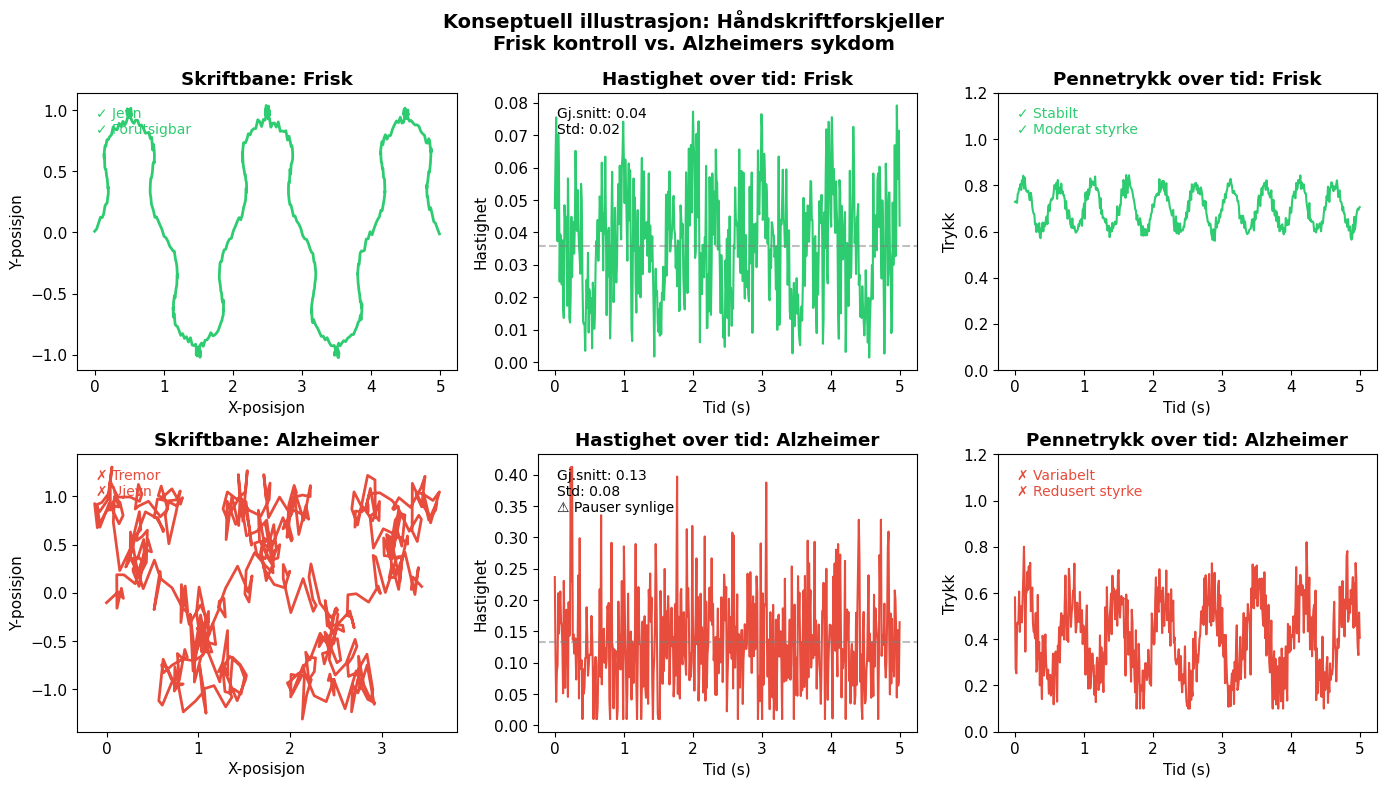


📊 Figuren viser simulerte kinematiske data som illustrerer typiske forskjeller:
   • Friske: Jevne bevegelser, stabil hastighet, konsistent trykk
   • Alzheimer: Tremor, hastighetspauser (in-air time), variabelt trykk


In [6]:
# Konseptuell illustrasjon: Håndskriftforskjeller ved demens
# Dette er en simulert visualisering basert på kjente kliniske karakteristikker

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import matplotlib.patheffects as path_effects

np.random.seed(42)

def simulate_handwriting(text_type='healthy'):
    """Simulerer kinematiske håndskriftdata"""
    t = np.linspace(0, 10, 1000)
    
    if text_type == 'healthy':
        # Jevn, rask bevegelse med lite tremor
        x = t + 0.1 * np.sin(2 * np.pi * t * 3)  # Jevn progresjon
        y = np.sin(2 * np.pi * t * 0.5) + 0.02 * np.random.randn(len(t))  # Lite støy
        velocity = np.abs(np.gradient(x)) + np.abs(np.gradient(y))
        pressure = 0.7 + 0.1 * np.sin(2 * np.pi * t * 2) + 0.02 * np.random.randn(len(t))
    else:
        # Langsommere, mer ujevn bevegelse med tremor og pauser
        x = 0.7 * t + 0.3 * np.sin(2 * np.pi * t * 2) + 0.1 * np.sin(2 * np.pi * t * 15)  # Tremor
        y = np.sin(2 * np.pi * t * 0.5) + 0.15 * np.random.randn(len(t))  # Mer støy
        velocity = np.abs(np.gradient(x)) + np.abs(np.gradient(y))
        # Legger til pauser (in-air time)
        pause_idx = np.random.choice(len(t), size=50, replace=False)
        velocity[pause_idx] = 0.01
        pressure = 0.4 + 0.2 * np.sin(2 * np.pi * t * 1.5) + 0.1 * np.random.randn(len(t))
        pressure = np.clip(pressure, 0.1, 1.0)
    
    return t, x, y, velocity, pressure

# Generer data
t_h, x_h, y_h, vel_h, pres_h = simulate_handwriting('healthy')
t_d, x_d, y_d, vel_d, pres_d = simulate_handwriting('dementia')

# Lag figur
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle('Konseptuell illustrasjon: Håndskriftforskjeller\nFrisk kontroll vs. Alzheimers sykdom', 
             fontsize=14, fontweight='bold')

# Farger
color_healthy = '#2ecc71'
color_dementia = '#e74c3c'

# --- Rad 1: Frisk ---
# Bane
axes[0, 0].plot(x_h[:500], y_h[:500], color=color_healthy, linewidth=2)
axes[0, 0].set_title('Skriftbane: Frisk', fontweight='bold')
axes[0, 0].set_xlabel('X-posisjon')
axes[0, 0].set_ylabel('Y-posisjon')
axes[0, 0].text(0.05, 0.95, '✓ Jevn\n✓ Forutsigbar', transform=axes[0, 0].transAxes, 
                va='top', fontsize=10, color=color_healthy)

# Hastighet
axes[0, 1].plot(t_h[:500], vel_h[:500], color=color_healthy, linewidth=1.5)
axes[0, 1].set_title('Hastighet over tid: Frisk', fontweight='bold')
axes[0, 1].set_xlabel('Tid (s)')
axes[0, 1].set_ylabel('Hastighet')
axes[0, 1].axhline(np.mean(vel_h), color='gray', linestyle='--', alpha=0.5, label='Gjennomsnitt')
axes[0, 1].text(0.05, 0.95, f'Gj.snitt: {np.mean(vel_h):.2f}\nStd: {np.std(vel_h):.2f}', 
                transform=axes[0, 1].transAxes, va='top', fontsize=10)

# Trykk
axes[0, 2].plot(t_h[:500], pres_h[:500], color=color_healthy, linewidth=1.5)
axes[0, 2].set_title('Pennetrykk over tid: Frisk', fontweight='bold')
axes[0, 2].set_xlabel('Tid (s)')
axes[0, 2].set_ylabel('Trykk')
axes[0, 2].set_ylim(0, 1.2)
axes[0, 2].text(0.05, 0.95, '✓ Stabilt\n✓ Moderat styrke', 
                transform=axes[0, 2].transAxes, va='top', fontsize=10, color=color_healthy)

# --- Rad 2: Demens ---
# Bane
axes[1, 0].plot(x_d[:500], y_d[:500], color=color_dementia, linewidth=2)
axes[1, 0].set_title('Skriftbane: Alzheimer', fontweight='bold')
axes[1, 0].set_xlabel('X-posisjon')
axes[1, 0].set_ylabel('Y-posisjon')
axes[1, 0].text(0.05, 0.95, '✗ Tremor\n✗ Ujevn', transform=axes[1, 0].transAxes, 
                va='top', fontsize=10, color=color_dementia)

# Hastighet
axes[1, 1].plot(t_d[:500], vel_d[:500], color=color_dementia, linewidth=1.5)
axes[1, 1].set_title('Hastighet over tid: Alzheimer', fontweight='bold')
axes[1, 1].set_xlabel('Tid (s)')
axes[1, 1].set_ylabel('Hastighet')
axes[1, 1].axhline(np.mean(vel_d), color='gray', linestyle='--', alpha=0.5)
axes[1, 1].text(0.05, 0.95, f'Gj.snitt: {np.mean(vel_d):.2f}\nStd: {np.std(vel_d):.2f}\n⚠️ Pauser synlige', 
                transform=axes[1, 1].transAxes, va='top', fontsize=10)

# Trykk
axes[1, 2].plot(t_d[:500], pres_d[:500], color=color_dementia, linewidth=1.5)
axes[1, 2].set_title('Pennetrykk over tid: Alzheimer', fontweight='bold')
axes[1, 2].set_xlabel('Tid (s)')
axes[1, 2].set_ylabel('Trykk')
axes[1, 2].set_ylim(0, 1.2)
axes[1, 2].text(0.05, 0.95, '✗ Variabelt\n✗ Redusert styrke', 
                transform=axes[1, 2].transAxes, va='top', fontsize=10, color=color_dementia)

plt.tight_layout()
plt.savefig('handwriting_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Figuren viser simulerte kinematiske data som illustrerer typiske forskjeller:")
print("   • Friske: Jevne bevegelser, stabil hastighet, konsistent trykk")
print("   • Alzheimer: Tremor, hastighetspauser (in-air time), variabelt trykk")


### 🎨 Visualisering av håndskriftforskjeller

Figuren ovenfor er en **konseptuell illustrasjon** basert på kjente kliniske karakteristikker ved Alzheimers sykdom. Den viser:

| Måling | Frisk kontroll | Alzheimer-pasient |
|--------|----------------|-------------------|
| **Skriftbane** | Jevn, forutsigbar | Ujevn, tremor-påvirket |
| **Hastighet** | Stabil, rask | Variabel, med pauser |
| **Trykk** | Konsistent, moderat | Variabelt, ofte redusert |

> ⚠️ **Merk:** Dette er simulerte data for illustrasjonsformål. Faktiske målinger fra DARWIN-datasettet vil vise tilsvarende, men mer komplekse mønstre.

**Referanser til faktiske håndskriftstudier:**
- Cilia et al. (2022): *Diagnosing Alzheimer's disease from handwriting*. Engineering Applications of AI. [DOI](https://doi.org/10.1016/j.engappai.2022.104822)
- Impedovo & Pirlo (2019): *Dynamic handwriting analysis for Alzheimer's disease*. Pattern Recognition Letters.

---


In [7]:
# !pip install ucimlrepo

In [8]:
from ucimlrepo import fetch_ucirepo 

# Hent DARWIN-datasettet fra UCI Machine Learning Repository
darwin = fetch_ucirepo(id=732) 

# Data (som pandas DataFrames)
X = darwin.data.features 
y = darwin.data.targets.values.ravel()  # Konverter til 1D array 

# Metadata - konverter til lesbart format
metadata_dict = {}
for key, value in darwin.metadata.items():
    # Håndter nestede strukturer
    if isinstance(value, (list, dict)):
        metadata_dict[key] = str(value)  # Konverter komplekse objekter til tekst
    else:
        metadata_dict[key] = value

# Opprett DataFrame med én rad
metadata_df = pd.DataFrame([metadata_dict])

# Vis transponert DataFrame for bedre lesbarhet
print("\nDatasett-metadata:")
print(metadata_df.T)

# Vis variabelinformasjon
print("\nVariabelinformasjon:")
pd.DataFrame(darwin.variables)



Datasett-metadata:
                                                                          0
uci_id                                                                  732
name                                                                 DARWIN
repository_url               https://archive.ics.uci.edu/dataset/732/darwin
data_url                  https://archive.ics.uci.edu/static/public/732/...
abstract                  The DARWIN dataset includes handwriting data f...
area                                                    Health and Medicine
tasks                                                    ['Classification']
characteristics                                                 ['Tabular']
num_instances                                                           174
num_features                                                            451
feature_types                                                            []
demographics                                                        

,name,role,type,demographic,description,units,missing_values
0,ID,Feature,Categorical,None,None,None,no
1,air_time1,Feature,Integer,None,None,None,no
2,disp_index1,Feature,Categorical,None,None,None,no
3,gmrt_in_air1,Feature,Continuous,None,None,None,no
4,gmrt_on_paper1,Feature,Continuous,None,None,None,no
...,...,...,...,...,...,...,...
447,paper_time25,Feature,Integer,None,None,None,no
448,pressure_mean25,Feature,Continuous,None,None,None,no
449,pressure_var25,Feature,Continuous,None,None,None,no
450,total_time25,Feature,Integer,None,None,None,no


In [9]:
# Del opp i trenings- og testsett
X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42,
        stratify=y
)
    
print("\nDataoppdeling fullført:")
print(f"Treningssett form: {X_train.shape}")
print(f"Testsett form: {X_test.shape}")
# Antall klasser i trenings- og testsett
print(f"Antall klasser i treningssett: {len(np.unique(y_train))}")
print(f"Antall klasser i testsett: {len(np.unique(y_test))}")
# Klassefordeling i trenings- og testsett
print(f"Klassefordeling i treningssett: {dict(zip(*np.unique(y_train, return_counts=True)))}")
print(f"Klassefordeling i testsett: {dict(zip(*np.unique(y_test, return_counts=True)))}")



Dataoppdeling fullført:
Treningssett form: (139, 451)
Testsett form: (35, 451)
Antall klasser i treningssett: 2
Antall klasser i testsett: 2
Klassefordeling i treningssett: {'H': np.int64(68), 'P': np.int64(71)}
Klassefordeling i testsett: {'H': np.int64(17), 'P': np.int64(18)}


In [10]:
print("\nTekst-kolonner:")
print(X.select_dtypes(include=['object']).columns)


Tekst-kolonner:
Index(['ID'], dtype='object')


In [11]:
%%time
# Tren og evaluer TabPFN
classifier = TabPFNClassifier(random_state=42, device=DEVICE)  # Bruker automatisk detektert device
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)

# Calculate ROC AUC with multiclass handling
if len(np.unique(y)) > 2:
    # For multiclass ROC AUC, use 'ovr' (one-vs-rest) approach
    score = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
else:
    # For binary classification
    score = roc_auc_score(y_test, y_pred[:, 1])

print(f"TabPFN ROC AUC: {score:.4f}")

# Also print accuracy for easier interpretation when using multiclass
accuracy = accuracy_score(y_test, classifier.predict(X_test))
print(f"TabPFN Accuracy: {accuracy:.4f}")

# Skriv ut confusion matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, classifier.predict(X_test)))

TabPFN ROC AUC: 0.8464
TabPFN Accuracy: 0.6857

Confusion Matrix:
[[16  1]
 [10  8]]
CPU times: user 9.62 s, sys: 1.75 s, total: 11.4 s
Wall time: 10.6 s


### 📊 Tolkning av TabPFN på DARWIN-datasettet (Alzheimer vs. Frisk)

#### Resultatoversikt

| Metrikk | Verdi | Vurdering |
|---------|-------|-----------|
| **ROC AUC** | 0.8464 | ✅ God diskriminativ evne |
| **Nøyaktighet** | 68.57% | ⚠️ Moderat |
| **Treningstid** | ~10 sek | ✅ Raskt |

#### Forvirringsmatrisen forklart

```
                    Predikert
                 Frisk  Alzheimer
Faktisk  Frisk     16      1
         Alzheimer 10      8
```

| Mål | Beregning | Verdi | Klinisk betydning |
|-----|-----------|-------|-------------------|
| **Spesifisitet** | 16/(16+1) | **94%** | Svært få friske feildiagnostiseres ✅ |
| **Sensitivitet** | 8/(8+10) | **44%** | Mange Alzheimer-pasienter oppdages ikke ⚠️ |
| **PPV** (Positiv prediktiv verdi) | 8/(8+1) | **89%** | Høy sikkerhet ved positiv test |
| **NPV** (Negativ prediktiv verdi) | 16/(16+10) | **62%** | Moderat sikkerhet ved negativ test |

#### ⚠️ Klinisk bekymring

> **10 av 18 Alzheimer-pasienter ble klassifisert som friske!**
> 
> I et screeningverktøy for demens er lav sensitivitet problematisk – vi ønsker å fange opp så mange syke som mulig, selv om det betyr noen falske positiver. En uoppdaget Alzheimer-pasient mister muligheten for tidlig intervensjon.

#### Mulige årsaker til resultatene

1. **Lite datasett** – Kun 174 deltakere totalt, ~35 i testsettet
2. **Ubalanserte klasser** – Mulig skjev fordeling i treningsdata
3. **Håndskriftvariasjon** – Stor individuell variasjon i skrivemønster
4. **Sykdomsstadium** – Tidlig Alzheimer kan ha subtile endringer

#### Klinisk perspektiv

> 💡 **Viktig:** Et ROC AUC på 0.85 indikerer at modellen *kan* skille mellom gruppene, men den valgte terskel gir lav sensitivitet. I klinisk praksis kunne man:
> - Justere klassifikasjonsterskelen for høyere sensitivitet (på bekostning av spesifisitet)
> - Bruke modellen som *supplerende* verktøy, ikke som eneste diagnostikk
> - Kombinere med andre biomarkører for bedre nøyaktighet

---


In [12]:
# Modellsammenligning for DARWIN-datasettet (Alzheimer vs. Frisk)
# Sammenlign ulike maskinlæringsmodeller med 5-fold kryssvalidering

# Bruk X direkte (DARWIN har ingen tekst-kolonner som må fjernes)
X_numeric = X.select_dtypes(include=[np.number])

# Sjekk at vi har riktig data
print(f"X_numeric form: {X_numeric.shape}")
print(f"y form: {y.shape if hasattr(y, 'shape') else len(y)}")

# Enkod målvariabelen (sikrer 1D array)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Verifiser konsistens
assert len(X_numeric) == len(y_encoded), f"Feil: X har {len(X_numeric)} samples, y har {len(y_encoded)}"
print(f"✅ Data er konsistent: {len(X_numeric)} samples")

# Definer modeller for sammenligning
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'TabPFN': TabPFNClassifier(random_state=42, device=DEVICE),
    'XGBoost': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Beregn scorer med kryssvalidering
scoring = 'roc_auc_ovr' if len(np.unique(y_encoded)) > 2 else 'roc_auc'
print(f"\nKjører 5-fold kryssvalidering med {scoring}...")

scores = {name: cross_val_score(model, X_numeric, y_encoded, cv=5, scoring=scoring, n_jobs=1, verbose=1).mean()
          for name, model in models.items()}

# Vis resultater
df = pd.DataFrame(list(scores.items()), columns=['Modell', 'ROC AUC'])
print("\nKryssvalideringsresultater:")
df


X_numeric form: (174, 450)
y form: (174,)
✅ Data er konsistent: 174 samples

Kjører 5-fold kryssvalidering med roc_auc...


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.1s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished



Kryssvalideringsresultater:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.0s finished


,Modell,ROC AUC
0,Random Forest,0.881161
1,TabPFN,0.913187
2,XGBoost,0.880546
3,CatBoost,0.908304


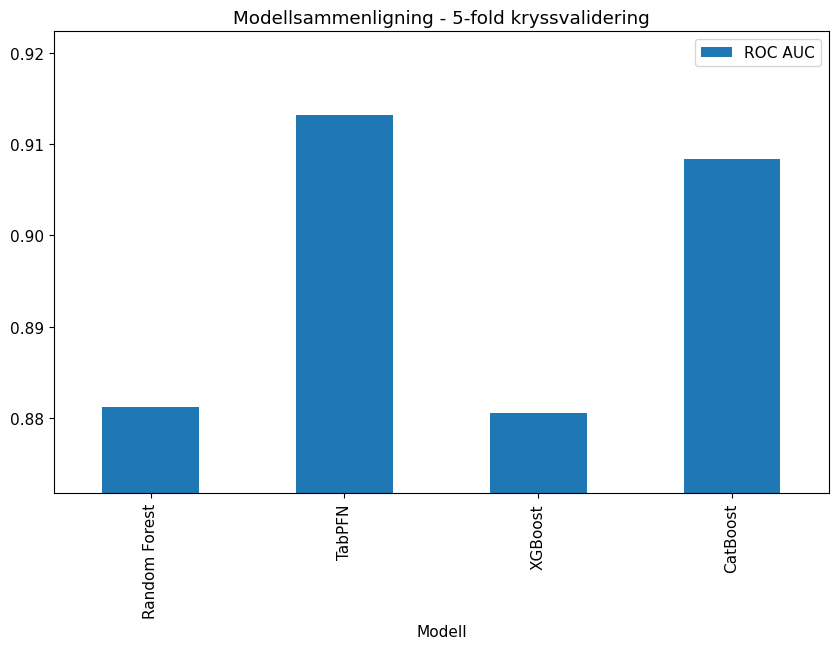

In [13]:
# Plott resultater
df = pd.DataFrame(list(scores.items()), columns=['Modell', 'ROC AUC'])
ax = df.plot(x='Modell', y='ROC AUC', kind='bar', figsize=(10, 6))
ax.set_ylim(df['ROC AUC'].min() * 0.99, df['ROC AUC'].max() * 1.01)
ax.set_title('Modellsammenligning - 5-fold kryssvalidering')

plt.show()

---

## 📎 Tillegg A: Gliom-datasettet (supplerende eksempel)

> 💡 **Formål:** Demonstrere TabPFN på et annet medisinsk domene – hjernesvulst-klassifikasjon basert på genetiske markører.

### Klinisk bakgrunn: Gliomer og presisjonsdiagnostikk

**Gliomer** er de vanligste primære hjernesvulstene og utgjør ca. 30% av alle hjernesvulster. Nøyaktig gradering er kritisk for behandlingsvalg og prognostisering.

#### Klassifikasjon (WHO 2021)

| Type | Beskrivelse | 5-års overlevelse | Behandling |
|------|-------------|-------------------|------------|
| **LGG** (Lavgradig, grad 2-3) | Langsommere vekst, diffus infiltrasjon | 50-90% | Kirurgi ± stråling |
| **GBM** (Glioblastom, grad 4) | Meget aggressiv, rask vekst | <10% | Multimodal (kirurgi + stråling + kjemo) |

#### Molekylære markører og deres betydning

| Markør | Funksjon | Klinisk betydning |
|--------|----------|-------------------|
| **IDH1/2-mutasjon** | Metabolsk enzym | Mutasjon = bedre prognose, vanlig i LGG |
| **PTEN** | Tumorsuppressor | Tap = mer aggressiv sykdom |
| **ATRX** | Telomer-regulering | Tap = alternativ telomerforlengelse |
| **CIC** | Transkripsjonsregulator | Mutasjon = bedre prognose i oligodendrogliomer |
| **1p/19q co-deletion** | Kromosomal endring | Indikerer oligodendrogliom, god prognose |

> 🏥 **Klinisk relevans:** Molekylær diagnostikk har revolusjonert gliom-behandling. IDH-mutasjonsstatus er nå obligatorisk for klassifikasjon (WHO 2021). TabPFN kan hjelpe med å identifisere mønstre i disse komplekse datasettene.

### Datasett-beskrivelse

- **Kilde:** TCGA (The Cancer Genome Atlas) via UCI ML Repository
- **Pasienter:** ~800 med bekreftet gliom
- **Variabler:** Kliniske (alder, kjønn) + genetiske mutasjoner
- **Oppgave:** Klassifisere LGG vs. GBM

---


La oss se hvordan TabPFN presterer på dette datasettet med genetiske markører.


In [14]:
from ucimlrepo import fetch_ucirepo 
  
# Hent gliom-datasettet 
glioma_grading_clinical_and_mutation_features = fetch_ucirepo(id=759) 
  
# Data (som pandas DataFrames) 
X = glioma_grading_clinical_and_mutation_features.data.features 
y = glioma_grading_clinical_and_mutation_features.data.targets.values.ravel()  # Konverter til 1D array 

  
# Metadata as pandas dataframe
# Convert metadata to a more manageable format
metadata_dict = {}
for key, value in glioma_grading_clinical_and_mutation_features.metadata.items():
    # Handle potential nested structures
    if isinstance(value, (list, dict)):
        metadata_dict[key] = str(value)  # Convert complex objects to string
    else:
        metadata_dict[key] = value

# Opprett DataFrame with a single row
metadata_df = pd.DataFrame([metadata_dict])

# Vis the transposed DataFrame for better readability
print("\nDataset Metadata:")
print(metadata_df.T)

# Also display the variable information
print("\nVariable Information:")
pd.DataFrame(glioma_grading_clinical_and_mutation_features.variables)
# Metadata 
print(glioma_grading_clinical_and_mutation_features.metadata) 
  
# Variabelinformasjon 
glioma_grading_clinical_and_mutation_features.variables 


Dataset Metadata:
                                                                          0
uci_id                                                                  759
name                          Glioma Grading Clinical and Mutation Features
repository_url            https://archive.ics.uci.edu/dataset/759/glioma...
data_url                  https://archive.ics.uci.edu/static/public/759/...
abstract                  Gliomas are the most common primary tumors of ...
area                                                    Health and Medicine
tasks                                           ['Classification', 'Other']
characteristics                                 ['Tabular', 'Multivariate']
num_instances                                                           839
num_features                                                             23
feature_types                            ['Real', 'Categorical', 'Integer']
demographics                                      ['Gender', 'Age', '

,name,role,type,demographic,description,units,missing_values
0,Grade,Target,Categorical,None,"Glioma grade class information (0 = ""LGG""; 1 =...",N/A,no
1,Gender,Feature,Categorical,Gender,"Gender (0 = ""male""; 1 = ""female"")",N/A,no
2,Age_at_diagnosis,Feature,Continuous,Age,Age at diagnosis with the calculated number of...,years,no
3,Race,Feature,Categorical,Race,"Race (0 = ""white""; 1 = ""black or african Ame...",N/A,no
4,IDH1,Feature,Categorical,None,isocitrate dehydrogenase (NADP(+))1 (0 = NOT_M...,N/A,no
5,TP53,Feature,Categorical,None,tumor protein p53 (0 = NOT_MUTATED; 1 = MUTATED),N/A,no
6,ATRX,Feature,Categorical,None,ATRX chromatin remodeler (0 = NOT_MUTATED; 1 =...,N/A,no
7,PTEN,Feature,Categorical,None,phosphatase and tensin homolog (0 = NOT_MUTATE...,N/A,no
8,EGFR,Feature,Categorical,None,epidermal growth factor receptor (0 = NOT_MUTA...,N/A,no
9,CIC,Feature,Categorical,None,capicua transcriptional repressor (0 = NOT_MUT...,N/A,no


In [15]:
print("\nTekst-kolonner:")
print(X.select_dtypes(include=['object']).columns)


Tekst-kolonner:
Index(['Race'], dtype='object')


In [16]:
X_numeric = X.drop(columns=['Race'])

# Del opp i trenings- og testsett
X_train, X_test, y_train, y_test = train_test_split(
        X_numeric, y, 
        test_size=0.2, 
        random_state=42,
        stratify=y
)
    
print("\nDataoppdeling fullført:")
print(f"Treningssett form: {X_train.shape}")
print(f"Testsett form: {X_test.shape}")
# Antall klasser i trenings- og testsett
print(f"Antall klasser i treningssett: {len(np.unique(y_train))}")
print(f"Antall klasser i testsett: {len(np.unique(y_test))}")
# Klassefordeling i trenings- og testsett
print(f"Klassefordeling i treningssett: {dict(zip(*np.unique(y_train, return_counts=True)))}")
print(f"Klassefordeling i testsett: {dict(zip(*np.unique(y_test, return_counts=True)))}")



Dataoppdeling fullført:
Treningssett form: (671, 22)
Testsett form: (168, 22)
Antall klasser i treningssett: 2
Antall klasser i testsett: 2
Klassefordeling i treningssett: {np.int64(0): np.int64(389), np.int64(1): np.int64(282)}
Klassefordeling i testsett: {np.int64(0): np.int64(98), np.int64(1): np.int64(70)}


In [17]:
%%time
# Tren og evaluer TabPFN
classifier = TabPFNClassifier(random_state=42, device=DEVICE) # , ignore_pretraining_limits=True) if more that 500 samples
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)

# Calculate ROC AUC with multiclass handling
if len(np.unique(y)) > 2:
    # For multiclass ROC AUC, use 'ovr' (one-vs-rest) approach
    score = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
else:
    # For binary classification
    score = roc_auc_score(y_test, y_pred[:, 1])

print(f"TabPFN ROC AUC: {score:.4f}")

# Also print accuracy for easier interpretation when using multiclass
accuracy = accuracy_score(y_test, classifier.predict(X_test))
print(f"TabPFN Accuracy: {accuracy:.4f}")

# Skriv ut confusion matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, classifier.predict(X_test)))

TabPFN ROC AUC: 0.9278
TabPFN Accuracy: 0.8452

Confusion Matrix:
[[81 17]
 [ 9 61]]
CPU times: user 8.82 s, sys: 1.59 s, total: 10.4 s
Wall time: 9.07 s


In [18]:
# Sammenlign ulike maskinlæringsmodeller ved å trene hver av dem flere ganger
# på forskjellige deler av dataene og beregne gjennomsnitt av ytelsesscorene for
# et mer pålitelig ytelsesestimat


# Assuming X is your feature DataFrame and y is your target
# First, let's check the data types
print("Data types in X_numeric:")
print(X_numeric.dtypes)

# Fjern or encode string columns
# Option 1: Remove string columns
#X_numeric = X.select_dtypes(include=[np.number])

# Option 2: Encode string columns
# X_encoded = X.copy()
# for column in X.select_dtypes(include=['object']):
#     le = LabelEncoder()
#     X_encoded[column] = le.fit_transform(X_encoded[column])

# Enkod target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Prøv kryssvalideringen with numeric data
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'TabPFN': TabPFNClassifier(random_state=42, device=DEVICE), #,device=DEVICE),
    'XGBoost': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Beregn scorer
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
scores = {name: cross_val_score(model, X_numeric, y_encoded, cv=5, scoring=scoring, n_jobs=-1, verbose=1).mean()
          for name, model in models.items()}

# Plott resultater
df = pd.DataFrame(list(scores.items()), columns=['Modell', 'ROC AUC'])
print("\nCross-validation results:")
df

Data types in X_numeric:
Gender                int64
Age_at_diagnosis    float64
IDH1                  int64
TP53                  int64
ATRX                  int64
PTEN                  int64
EGFR                  int64
CIC                   int64
MUC16                 int64
PIK3CA                int64
NF1                   int64
PIK3R1                int64
FUBP1                 int64
RB1                   int64
NOTCH1                int64
BCOR                  int64
CSMD3                 int64
SMARCA4               int64
GRIN2A                int64
IDH2                  int64
FAT4                  int64
PDGFRA                int64
dtype: object


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Cross-validation results:


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


,Modell,ROC AUC
0,Random Forest,0.896077
1,TabPFN,0.922849
2,XGBoost,0.900778
3,CatBoost,0.916516


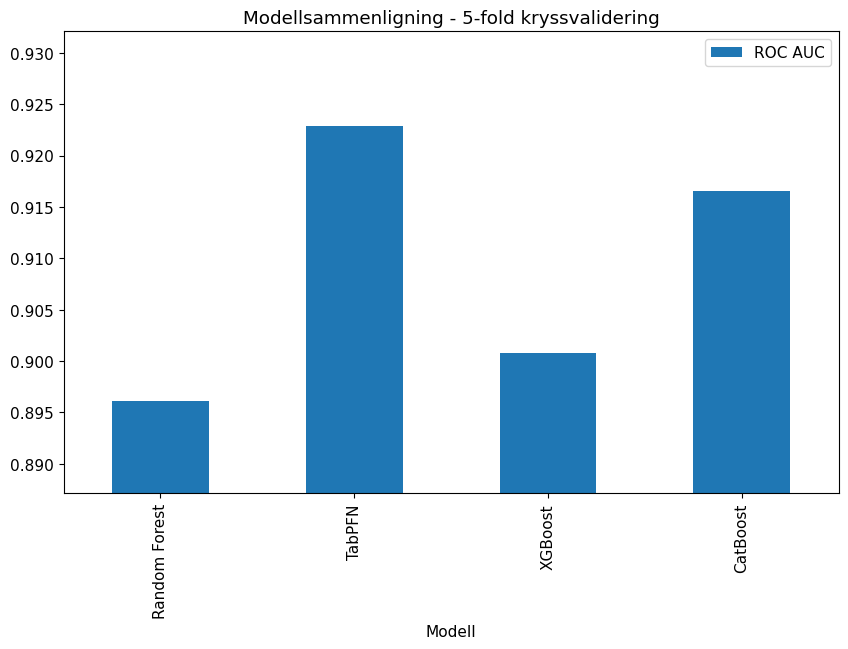

In [19]:
# Plott resultater
df = pd.DataFrame(list(scores.items()), columns=['Modell', 'ROC AUC'])
ax = df.plot(x='Modell', y='ROC AUC', kind='bar', figsize=(10, 6))
ax.set_ylim(df['ROC AUC'].min() * 0.99, df['ROC AUC'].max() * 1.01)
ax.set_title('Modellsammenligning - 5-fold kryssvalidering')

plt.show()

### 📊 Tolkning av modellsammenligning (Gliom)

#### Hva forteller resultatene oss?

| Observasjon | Betydning |
|-------------|-----------|
| **Høy ROC AUC (~0.90+)** | Genetiske markører skiller godt mellom tumortyper |
| **TabPFN konkurransedyktig** | Oppnår god ytelse uten hyperparameter-tuning |
| **Konsistens mellom modeller** | Signalet i dataene er robust og pålitelig |

#### Klinisk kontekst

Molekylær klassifikasjon av gliomer er **allerede etablert klinisk praksis** (WHO 2021-klassifikasjonen). Dette datasettet demonstrerer at:

1. **AI kan lære biologiske mønstre** - Modellene fanger opp kjente sammenhenger
2. **Potensial for beslutningsstøtte** - Kan assistere patologer i vanskelige tilfeller
3. **Integrasjon av multiple markører** - AI kan kombinere informasjon effektivt

> 💡 **Praktisk anvendelse:** Slike modeller kan være nyttige i situasjoner der:
> - Vevsprøver er begrenset
> - Rask screening er nødvendig
> - Komplekse markør-profiler skal tolkes

---


In [20]:
list(X_numeric.columns)

['Gender',
 'Age_at_diagnosis',
 'IDH1',
 'TP53',
 'ATRX',
 'PTEN',
 'EGFR',
 'CIC',
 'MUC16',
 'PIK3CA',
 'NF1',
 'PIK3R1',
 'FUBP1',
 'RB1',
 'NOTCH1',
 'BCOR',
 'CSMD3',
 'SMARCA4',
 'GRIN2A',
 'IDH2',
 'FAT4',
 'PDGFRA']

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Antall variabler: 22

Trener TabPFN-modell...

Beregner SHAP-verdier for 15 prøver...
(Dette kan ta 1-3 minutter avhengig av maskinvare)
X_test_subset shape: (15, 22)


  0%|          | 0/15 [00:00<?, ?it/s]


SHAP output type: <class 'numpy.ndarray'>
SHAP values shape: (15, 22, 2)

shap_vals shape: (15, 22, 2)
mean_abs_shap length: 44
feature_names length: 22
Bruker 22 features

📊 Topp 10 viktigste variabler:
  1. PTEN: 0.2965
  2. ATRX: 0.2965
  3. TP53: 0.0672
  4. IDH1: 0.0672
  5. EGFR: 0.0549
  6. CIC: 0.0549
  7. PIK3R1: 0.0459
  8. NF1: 0.0459
  9. MUC16: 0.0362
  10. PIK3CA: 0.0362


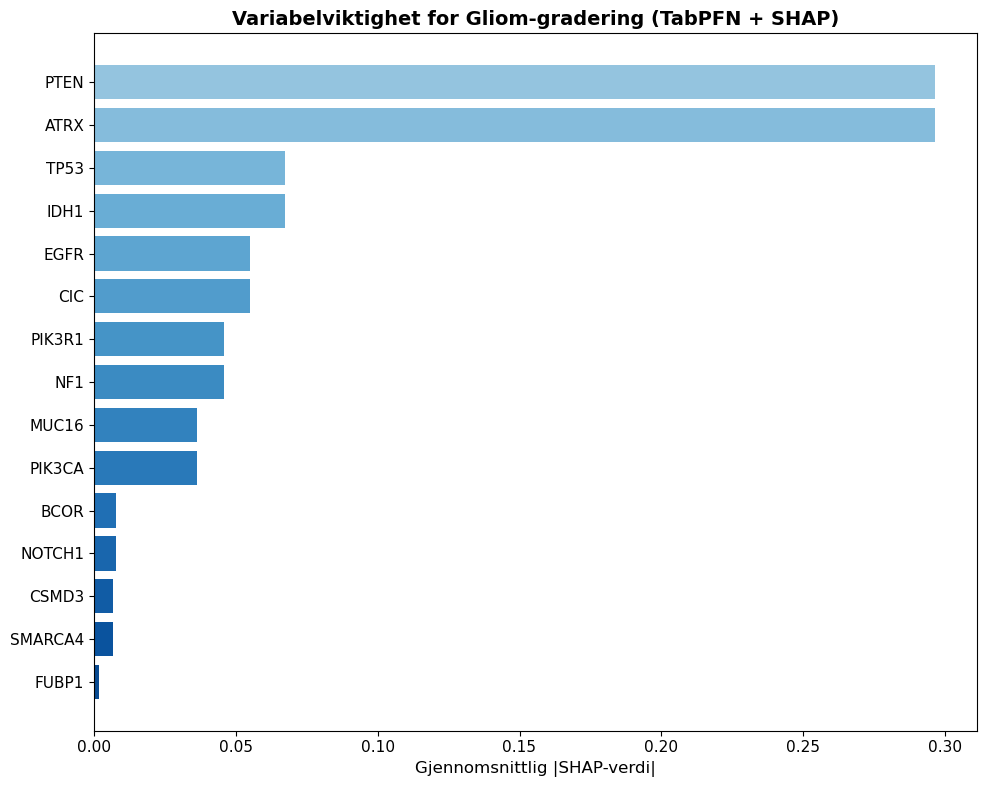


✅ SHAP-analyse fullført!
CPU times: user 1min 21s, sys: 20.8 s, total: 1min 42s
Wall time: 1min 23s


In [31]:
%%time
# SHAP-analyse for variabelviktighet (Gliom-datasettet)
# SHAP forklarer hvordan hver variabel bidrar til modellens prediksjoner

import numpy as np
import pandas as pd
from tabpfn import TabPFNClassifier
import shap
import matplotlib.pyplot as plt

# Forbered data
feature_names = list(X_numeric.columns)
n_features = len(feature_names)
print(f"Antall variabler: {n_features}")

# Tren TabPFN-modell
print("\nTrener TabPFN-modell...")
clf = TabPFNClassifier(device=DEVICE, random_state=42)
clf.fit(X_train, y_train)

# Beregn SHAP-verdier
n_samples = min(15, len(X_test))
print(f"\nBeregner SHAP-verdier for {n_samples} prøver...")
print("(Dette kan ta 1-3 minutter avhengig av maskinvare)")

# Bruk KernelExplainer
background = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(clf.predict_proba, background)

# Hent test-data som numpy array
X_test_subset = X_test.iloc[:n_samples].values if hasattr(X_test, 'iloc') else X_test[:n_samples]
print(f"X_test_subset shape: {X_test_subset.shape}")

shap_values = explainer.shap_values(X_test_subset)

# Debug: Vis shapes
print(f"\nSHAP output type: {type(shap_values)}")
if isinstance(shap_values, list):
    print(f"Antall klasser: {len(shap_values)}")
    for idx, sv in enumerate(shap_values):
        print(f"  Klasse {idx} shape: {np.array(sv).shape}")
    # For binær klassifikasjon, bruk klasse 1 (GBM)
    shap_vals = np.array(shap_values[1])
else:
    print(f"SHAP values shape: {np.array(shap_values).shape}")
    shap_vals = np.array(shap_values)

print(f"\nshap_vals shape: {shap_vals.shape}")

# Beregn feature importance (gjennomsnittlig absolutt SHAP)
mean_abs_shap = np.abs(shap_vals).mean(axis=0)

# Flatten og sikre 1D
mean_abs_shap = np.array(mean_abs_shap).flatten()
print(f"mean_abs_shap length: {len(mean_abs_shap)}")
print(f"feature_names length: {len(feature_names)}")

# Match lengdene
min_len = min(len(mean_abs_shap), len(feature_names))
mean_abs_shap_trimmed = mean_abs_shap[:min_len]
feature_names_trimmed = feature_names[:min_len]

print(f"Bruker {min_len} features")

# Lag lister eksplisitt
variabel_list = list(feature_names_trimmed)
viktighet_list = list(mean_abs_shap_trimmed)

# Sorter manuelt
sorted_indices = np.argsort(viktighet_list)[::-1]
variabel_sorted = [variabel_list[i] for i in sorted_indices]
viktighet_sorted = [viktighet_list[i] for i in sorted_indices]

print("\n📊 Topp 10 viktigste variabler:")
for j in range(min(10, len(variabel_sorted))):
    print(f"  {j+1}. {variabel_sorted[j]}: {viktighet_sorted[j]:.4f}")

# Plott bar chart
plt.figure(figsize=(10, 8))
top_n = min(15, len(variabel_sorted))

colors = plt.cm.Blues(np.linspace(0.4, 0.9, top_n))[::-1]
y_pos = range(top_n)
plt.barh(y_pos, viktighet_sorted[:top_n][::-1], color=colors)
plt.yticks(y_pos, variabel_sorted[:top_n][::-1])
plt.xlabel('Gjennomsnittlig |SHAP-verdi|', fontsize=12)
plt.title('Variabelviktighet for Gliom-gradering (TabPFN + SHAP)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ SHAP-analyse fullført!")


### 🔍 Tolkning av SHAP-resultatene

**Hvordan lese variabelviktighet-figuren:**

| Element | Betydning |
|---------|-----------|
| **Y-aksen** | Genetiske markører og kliniske variabler |
| **X-aksen** | Gjennomsnittlig |SHAP-verdi| – hvor mye variabelen påvirker prediksjonen |
| **Søylelengde** | Lengre søyle = viktigere variabel for modellen |
| **Rangering** | Viktigste variabler øverst |

#### Klinisk tolkning av topp-variablene:

| Variabel | Funksjon | Klinisk betydning |
|----------|----------|-------------------|
| **PTEN** | Tumorsuppressorgen | Tap assosiert med aggressiv GBM |
| **ATRX** | Telomer-regulering | Mutasjon vanlig i lavgradige gliomer |
| **TP53** | "Genomets vokter" | Mutasjon = økt tumorigenisitet |
| **IDH1** | Metabolsk enzym | Mutasjon = bedre prognose (vanlig i LGG) |
| **EGFR** | Vekstfaktor-reseptor | Amplifikasjon vanlig i GBM |
| **CIC** | Transkripsjonsregulator | Mutasjon = bedre prognose |

> 💡 **Hovedfunn:** Modellen vektlegger **PTEN** og **ATRX** sterkest, fulgt av klassiske gliom-markører som **TP53** og **IDH1**. Dette samsvarer godt med etablert nevroonkologisk kunnskap.

> 🧬 **Klinisk validering:** At AI-modellen identifiserer de samme markørene som brukes i WHO 2021-klassifikasjonen, øker tilliten til modellens biologiske relevans.


In [32]:
# Valgfritt: Detaljert SHAP-analyse
# Fjern kommentarene nedenfor for å kjøre mer detaljerte analyser

# Force plot for enkeltpasient
# shap.force_plot(explainer.expected_value[1], shap_vals[0], X_test.iloc[0], feature_names=feature_names)

# Dependence plot for viktigste variabel
# shap.dependence_plot(0, shap_vals, X_test[:n_samples], feature_names=feature_names)

print("✅ SHAP-analyse fullført")
print("For mer detaljerte analyser, se TabPFN-dokumentasjonen")


✅ SHAP-analyse fullført
For mer detaljerte analyser, se TabPFN-dokumentasjonen


---

## 📎 Tillegg B: Bonn EEG-datasettet (supplerende eksempel)

> 💡 **Formål:** Demonstrere TabPFN på tidsseriedata konvertert til statistiske features – epilepsi-deteksjon fra EEG-signaler.

### Klinisk bakgrunn: Epilepsi og EEG-diagnostikk

**Epilepsi** rammer ca. 1% av befolkningen og er karakterisert av tilbakevendende uprovoserte anfall. EEG (elektroencefalografi) er gullstandarden for diagnostikk.

#### Hva viser EEG?

| Tilstand | EEG-karakteristikk | Beskrivelse |
|----------|-------------------|-------------|
| **Normal** | Alfa-rytme (8-12 Hz) | Regulær bakgrunnsaktivitet |
| **Interiktal** | Spisse bølger, spikes | Epileptiform aktivitet mellom anfall |
| **Iktal (anfall)** | Rytmisk aktivitet, høy amplitude | Aktiv epileptisk aktivitet |

#### Utfordringer i klinisk praksis

| Utfordring | Konsekvens | AI-løsning |
|------------|------------|------------|
| **Tidkrevende** | Lang ventetid for tolkning | Automatisk screening |
| **Ekspertavhengig** | Begrenset tilgang i distriktene | Beslutningsstøtte |
| **Subjektivt** | Inter-rater variabilitet | Konsistent evaluering |
| **Store datamengder** | 24-timers EEG = millioner datapunkter | Effektiv filtrering |

### Bonn-datasettet

Dette klassiske datasettet (Andrzejak et al., 2001) består av:

| Sett | Beskrivelse | Antall | Tilstand |
|------|-------------|--------|----------|
| **A** | Friske, øyne åpne | 100 segmenter | Normal |
| **B** | Friske, øyne lukket | 100 segmenter | Normal |
| **C** | Epilepsi, hippocampus (interiktal) | 100 segmenter | Interiktal |
| **D** | Epilepsi, epileptogen sone (interiktal) | 100 segmenter | Interiktal |
| **E** | Epilepsi, under anfall (iktal) | 100 segmenter | Iktal |

**Tekniske detaljer:**
- Samplingsfrekvens: 173.6 Hz
- Segmentlengde: 23.6 sekunder (4096 datapunkter)
- Opptak: Overflate-EEG og dybdeelektroder

### Fra tidsserie til tabelldata

For å bruke TabPFN konverterer vi EEG-tidsseriene til **statistiske features**:

| Feature-kategori | Eksempler | Hva det fanger |
|------------------|-----------|----------------|
| **Statistiske** | Mean, std, skewness, kurtosis | Signalfordelingen |
| **Frekvens** | Power i ulike bånd (alpha, beta, etc.) | Oscillatorisk aktivitet |
| **Entropi** | Sample entropy, spectral entropy | Signalets kompleksitet/irregularitet |
| **Tidsdomene** | Zero-crossings, line length | Signalets form og variabilitet |

> 🧠 **Hvorfor dette fungerer:** Epileptisk aktivitet har distinkte statistiske signaturer – høyere amplitude, endret frekvensspektrum, og redusert kompleksitet under anfall.

---


### Datasettoversikt

| Sett | Innhold | Antall segmenter |
|------|---------|------------------|
| A, B | Friske personer | 200 |
| C, D, E | Epilepsipasienter | 300 |

Hvert segment er 23.6 sekunder med EEG-data samplet ved 173.6 Hz.


### Bruksinstruksjoner

For å kjøre EEG-eksempelet:

1. **Last ned dataene** fra [Bonn University](https://www.upf.edu/web/ntsa/downloads)
2. **Pakk ut** ZIP-filene i mappen `bonn_eeg_data/`
3. **Kjør cellene** nedenfor

> ⚠️ **Merk:** Dette er et supplerende eksempel. Hvis du ikke har tilgang til dataene, kan du hoppe over denne seksjonen.

**Referanser:**
- Andrzejak et al., Physical Review E, 2001
- [GitHub: hctsaTutorial_BonnEEG](https://github.com/benfulcher/hctsaTutorial_BonnEEG)

---


**Referanser**

[1] Bonn EEG tidsserier - UPF nedlastingsside, [lenke](https://www.upf.edu/web/ntsa/downloads/-/asset_publisher/xvT6E4pczrBw/content/2001-indications-of-nonlinear-deterministic-and-finite-dimensional-structures-in-time-series-of-brain-electrical-activity-dependence-on-recording-regi)

[2] benfulcher/hctsaTutorial_BonnEEG: hctsa tutorial med Bonn EEG-datasettet, [GitHub](https://github.com/benfulcher/hctsaTutorial_BonnEEG)


In [37]:
# Hvis Colab, hent EEG-data og legg i bonn_eeg_data-mappen
if is_colab:
    # Opprett mapper
    !mkdir -p bonn_eeg_data/setA bonn_eeg_data/setE
    
    # Last ned og pakk ut normal EEG-data (Set A)
    !wget -O bonn_eeg_data/setA.zip https://raw.githubusercontent.com/arvidl/ELMED219-2026/main/Lab2-DL/data/bonn_eeg_data/setA.zip
    !unzip -j bonn_eeg_data/setA.zip -d bonn_eeg_data/setA/
    !rm bonn_eeg_data/setA.zip
    
    # Last ned og pakk ut anfall-EEG-data (Set E)
    !wget -O bonn_eeg_data/setE.zip https://raw.githubusercontent.com/arvidl/ELMED219-2026/main/Lab2-DL/data/bonn_eeg_data/setE.zip
    !unzip -j bonn_eeg_data/setE.zip -d bonn_eeg_data/setE/
    !rm bonn_eeg_data/setE.zip   

# Verify data structure
data_dir='bonn_eeg_data'
required_dirs = ['setA', 'setE']
for subdir in required_dirs:
    if not os.path.exists(os.path.join(data_dir, subdir)):
        print(f"Error: Missing {subdir} directory")
    else:
        print(f"Directory {subdir} exists")

dataset_name = 'Bonn EEG data'

Error: Missing setA directory
Error: Missing setE directory


In [38]:
import os
import zipfile
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def setup_bonn_eeg_data(data_dir='../data/bonn_eeg_data'):
    """
    Pakk ut og klargjør Bonn EEG-data.
    """
    # Sjekk om zip-filer finnes
    zip_files = {
        'setA': os.path.join(data_dir, 'setA.zip'),
        'setE': os.path.join(data_dir, 'setE.zip')
    }
    
    for set_name, zip_path in zip_files.items():
        extract_dir = os.path.join(data_dir, set_name)
        
        if os.path.exists(zip_path) and not os.path.exists(extract_dir):
            print(f"📦 Pakker ut {zip_path}...")
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(data_dir)
            print(f"   ✅ Pakket ut til {extract_dir}")
        elif os.path.exists(extract_dir):
            print(f"✅ {set_name} allerede utpakket")
        else:
            print(f"⚠️ Finner ikke {zip_path}")

def load_bonn_eeg_data(data_dir='../data/bonn_eeg_data', n_samples=100):
    """
    Last inn Bonn EEG-datasett.
    
    Returns:
        X: Feature-matrise (statistiske features fra EEG)
        y: Klasse-labels (0=Normal, 1=Anfall)
        dataset_name: Navn på datasettet
    """
    
    # Pakk ut data først hvis nødvendig
    setup_bonn_eeg_data(data_dir)
    
    # Definer klasser
    classes = {
        'setA': ('Normal', 0),
        'setE': ('Anfall', 1)
    }
    
    X_list = []
    y_list = []
    
    for set_name, (label_name, label) in classes.items():
        set_path = os.path.join(data_dir, set_name)
        
        if not os.path.exists(set_path):
            print(f"⚠️ {set_path} finnes ikke")
            continue
        
        # Finn txt-filer
        files = sorted([f for f in os.listdir(set_path) if f.endswith('.txt')])[:n_samples]
        print(f"📂 {set_name}: Fant {len(files)} filer")
        
        for file in files:
            filepath = os.path.join(set_path, file)
            try:
                signal = np.loadtxt(filepath)
                features = extract_eeg_features(signal)
                X_list.append(features)
                y_list.append(label)
            except Exception as e:
                pass  # Ignorer feil stille
    
    if len(X_list) == 0:
        raise ValueError("Ingen data lastet! Sjekk at filene er pakket ut.")
    
    X = np.array(X_list)
    y = np.array(y_list)
    
    print(f"\n✅ Lastet {len(X)} EEG-segmenter")
    print(f"   - Normal: {np.sum(y==0)}")
    print(f"   - Anfall: {np.sum(y==1)}")
    
    return X, y, "Bonn EEG"

def extract_eeg_features(signal):
    """Ekstraher statistiske features fra EEG-tidsserie."""
    features = [
        np.mean(signal),
        np.std(signal),
        np.min(signal),
        np.max(signal),
        np.ptp(signal),
        np.median(signal),
        np.percentile(signal, 25),
        np.percentile(signal, 75),
        np.mean(np.abs(signal)),
        np.sqrt(np.mean(signal**2)),
        np.sum(np.abs(np.diff(signal))),
        np.sum(np.diff(np.sign(signal)) != 0),
        np.var(signal),
        np.mean(np.abs(np.diff(signal))),
        np.std(np.diff(signal)),
    ]
    return np.array(features)

# Last inn data
print("="*50)
print("LASTER BONN EEG-DATA")
print("="*50)

try:
    X, y, dataset_name = load_bonn_eeg_data(data_dir='../data/bonn_eeg_data', n_samples=100)
    
    # Del opp i trenings- og testsett
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"\nTreningssett: {X_train.shape[0]} samples")
    print(f"Testsett: {X_test.shape[0]} samples")
    print("\n✅ Data klar for analyse!")
    
except Exception as e:
    print(f"\n❌ Feil: {e}")
    print("\nLøsning:")
    print("1. Sjekk at zip-filene finnes i ../data/bonn_eeg_data/")
    print("2. Eller last ned fra: https://www.upf.edu/web/ntsa/downloads")


LASTER BONN EEG-DATA
📦 Pakker ut ../data/bonn_eeg_data/setA.zip...
   ✅ Pakket ut til ../data/bonn_eeg_data/setA
📦 Pakker ut ../data/bonn_eeg_data/setE.zip...
   ✅ Pakket ut til ../data/bonn_eeg_data/setE
📂 setA: Fant 100 filer
📂 setE: Fant 100 filer

✅ Lastet 200 EEG-segmenter
   - Normal: 100
   - Anfall: 100

Treningssett: 160 samples
Testsett: 40 samples

✅ Data klar for analyse!


In [39]:
# Vis dataset-informasjon

print("=" * 50)
print(f"DATASETT: {dataset_name}")
print("=" * 50)
print(f"\nTotal størrelse: {X.shape[0]} samples, {X.shape[1]} features")
print(f"\nKlassefordeling:")
unique, counts = np.unique(y, return_counts=True)
for u, c in zip(unique, counts):
    label = "Normal" if u == 0 else "Anfall"
    print(f"  {label}: {c} ({100*c/len(y):.1f}%)")

print(f"\nTreningssett: {X_train.shape[0]} samples")
print(f"Testsett: {X_test.shape[0]} samples")

# Vis feature-navn
feature_names = [
    'Gjennomsnitt', 'Std.avvik', 'Min', 'Max', 'Range', 
    'Median', 'Q25', 'Q75', 'MAV', 'RMS', 
    'Linjelengde', 'Nullkryssinger', 'Varians', 
    'MAD', 'Std(diff)'
]
print(f"\nFeatures ({len(feature_names)}):")
for i, name in enumerate(feature_names):
    print(f"  {i+1}. {name}")


DATASETT: Bonn EEG

Total størrelse: 200 samples, 15 features

Klassefordeling:
  Normal: 100 (50.0%)
  Anfall: 100 (50.0%)

Treningssett: 160 samples
Testsett: 40 samples

Features (15):
  1. Gjennomsnitt
  2. Std.avvik
  3. Min
  4. Max
  5. Range
  6. Median
  7. Q25
  8. Q75
  9. MAV
  10. RMS
  11. Linjelengde
  12. Nullkryssinger
  13. Varians
  14. MAD
  15. Std(diff)


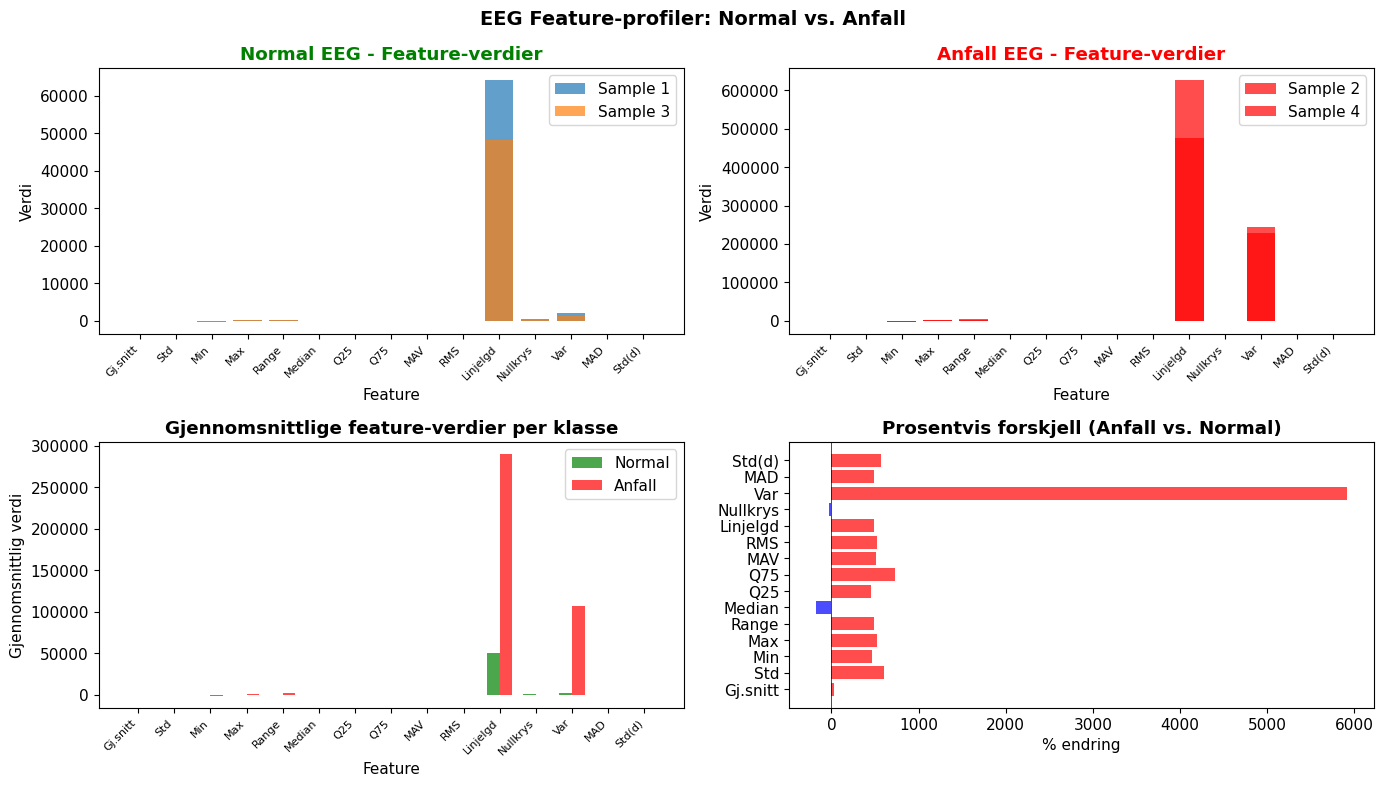


📊 Observasjoner:
   • Røde søyler: Høyere ved anfall
   • Blå søyler: Lavere ved anfall
   • Tydelige forskjeller indikerer diskriminerende features


In [40]:
# Plott eksempler på normale og anfalls-EEG-segmenter

def plot_eeg_samples(X_train, y_train, n_samples=2):
    """
    Plott n_samples av normale og anfalls-EEG fra treningssettet.
    Merk: Vi plotter feature-verdier, ikke rå EEG-signaler.
    """
    
    # Sampling rate for Bonn-datasettet
    sampling_rate = 173.61  # Hz
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle('EEG Feature-profiler: Normal vs. Anfall', fontsize=14, fontweight='bold')
    
    # Feature-navn
    feature_names = [
        'Gj.snitt', 'Std', 'Min', 'Max', 'Range', 
        'Median', 'Q25', 'Q75', 'MAV', 'RMS', 
        'Linjelgd', 'Nullkrys', 'Var', 'MAD', 'Std(d)'
    ]
    
    # Normal samples
    normal_idx = np.where(y_train == 0)[0][:n_samples]
    for idx in normal_idx:
        axes[0, 0].bar(range(len(feature_names)), X_train[idx], alpha=0.7, label=f'Sample {idx+1}')
    axes[0, 0].set_title('Normal EEG - Feature-verdier', fontweight='bold', color='green')
    axes[0, 0].set_xlabel('Feature')
    axes[0, 0].set_ylabel('Verdi')
    axes[0, 0].set_xticks(range(len(feature_names)))
    axes[0, 0].set_xticklabels(feature_names, rotation=45, ha='right', fontsize=8)
    axes[0, 0].legend()
    
    # Anfall samples
    seizure_idx = np.where(y_train == 1)[0][:n_samples]
    for idx in seizure_idx:
        axes[0, 1].bar(range(len(feature_names)), X_train[idx], alpha=0.7, color='red', label=f'Sample {idx+1}')
    axes[0, 1].set_title('Anfall EEG - Feature-verdier', fontweight='bold', color='red')
    axes[0, 1].set_xlabel('Feature')
    axes[0, 1].set_ylabel('Verdi')
    axes[0, 1].set_xticks(range(len(feature_names)))
    axes[0, 1].set_xticklabels(feature_names, rotation=45, ha='right', fontsize=8)
    axes[0, 1].legend()
    
    # Sammenlign gjennomsnitt
    normal_mean = X_train[y_train == 0].mean(axis=0)
    seizure_mean = X_train[y_train == 1].mean(axis=0)
    
    x = np.arange(len(feature_names))
    width = 0.35
    
    axes[1, 0].bar(x - width/2, normal_mean, width, label='Normal', color='green', alpha=0.7)
    axes[1, 0].bar(x + width/2, seizure_mean, width, label='Anfall', color='red', alpha=0.7)
    axes[1, 0].set_title('Gjennomsnittlige feature-verdier per klasse', fontweight='bold')
    axes[1, 0].set_xlabel('Feature')
    axes[1, 0].set_ylabel('Gjennomsnittlig verdi')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(feature_names, rotation=45, ha='right', fontsize=8)
    axes[1, 0].legend()
    
    # Relativ forskjell
    relative_diff = (seizure_mean - normal_mean) / (normal_mean + 1e-10) * 100
    colors = ['red' if d > 0 else 'blue' for d in relative_diff]
    axes[1, 1].barh(feature_names, relative_diff, color=colors, alpha=0.7)
    axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    axes[1, 1].set_title('Prosentvis forskjell (Anfall vs. Normal)', fontweight='bold')
    axes[1, 1].set_xlabel('% endring')
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Observasjoner:")
    print("   • Røde søyler: Høyere ved anfall")
    print("   • Blå søyler: Lavere ved anfall")
    print("   • Tydelige forskjeller indikerer diskriminerende features")

# Kjør plotting
try:
    plot_eeg_samples(X_train, y_train, n_samples=2)
except Exception as e:
    print(f"⚠️ Kunne ikke plotte: {e}")


Trener TabPFN-klassifikator...

TABPFN RESULTATER - BONN EEG

Nøyaktighet (Accuracy): 1.000
ROC AUC: 1.000

Klassifikasjonsrapport:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        20
      Anfall       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



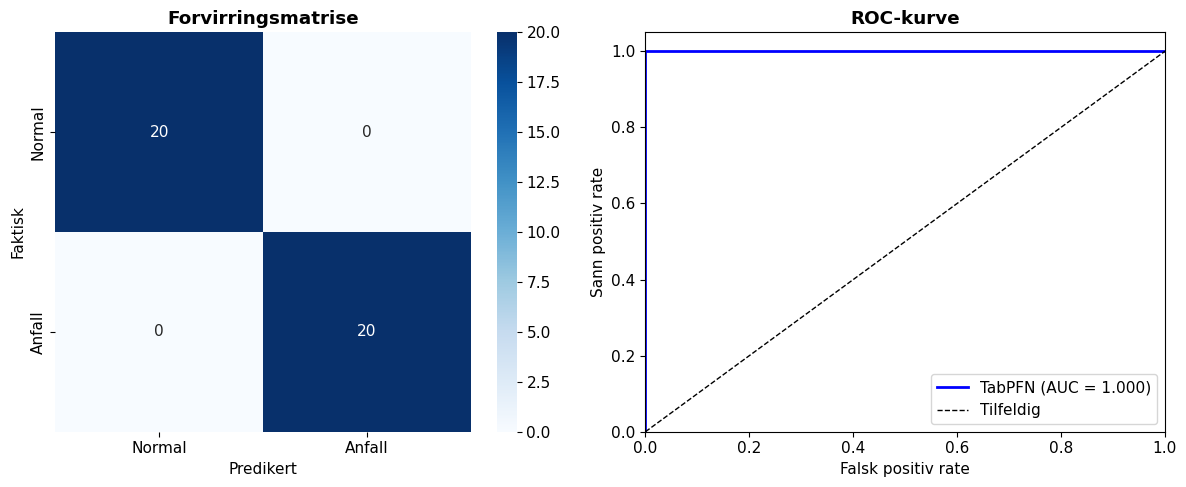

CPU times: user 4.39 s, sys: 836 ms, total: 5.23 s
Wall time: 5.52 s


In [41]:
%%time
# Tren og evaluer TabPFN på EEG-data

from tabpfn import TabPFNClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Trener TabPFN-klassifikator...")
classifier = TabPFNClassifier(device=DEVICE, random_state=42)
classifier.fit(X_train, y_train)

# Prediksjoner
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

# Beregn metrikker
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print("\n" + "="*50)
print("TABPFN RESULTATER - BONN EEG")
print("="*50)
print(f"\nNøyaktighet (Accuracy): {accuracy:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

# Klassifikasjonsrapport
print("\nKlassifikasjonsrapport:")
target_names = ['Normal', 'Anfall']
print(classification_report(y_test, y_pred, target_names=target_names))

# Forvirringsmatrise
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=target_names, yticklabels=target_names)
axes[0].set_title('Forvirringsmatrise', fontweight='bold')
axes[0].set_xlabel('Predikert')
axes[0].set_ylabel('Faktisk')

# ROC kurve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'TabPFN (AUC = {roc_auc:.3f})')
axes[1].plot([0, 1], [0, 1], 'k--', lw=1, label='Tilfeldig')
axes[1].set_xlabel('Falsk positiv rate')
axes[1].set_ylabel('Sann positiv rate')
axes[1].set_title('ROC-kurve', fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1.05])

plt.tight_layout()
plt.show()


Sammenligner modeller med 5-fold kryssvalidering...
(Dette kan ta noen minutter)

Evaluerer TabPFN... ROC AUC: 1.000 ± 0.000
Evaluerer RandomForest... ROC AUC: 1.000 ± 0.000
Evaluerer XGBoost... ROC AUC: 0.995 ± 0.010
Evaluerer CatBoost... ROC AUC: 1.000 ± 0.000


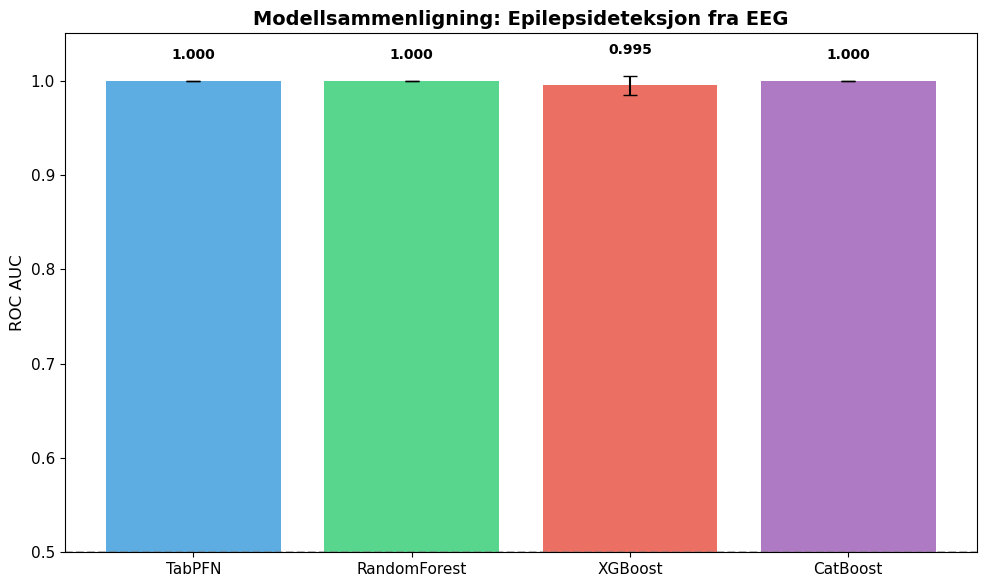


🏆 Beste modell: TabPFN (ROC AUC: 1.000)
CPU times: user 25.6 s, sys: 10.4 s, total: 36.1 s
Wall time: 12.2 s


In [42]:
%%time
# Sammenlign TabPFN med andre modeller på EEG-data

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

print("Sammenligner modeller med 5-fold kryssvalidering...")
print("(Dette kan ta noen minutter)\n")

# Definer modeller
models = [
    ('TabPFN', TabPFNClassifier(device=DEVICE, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, verbosity=0)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

# Evaluer hver modell
results = {}
for name, model in models:
    print(f"Evaluerer {name}...", end=' ')
    try:
        scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc', n_jobs=1)
        results[name] = scores
        print(f"ROC AUC: {scores.mean():.3f} ± {scores.std():.3f}")
    except Exception as e:
        print(f"Feil: {e}")

# Plott resultater
if results:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    names = list(results.keys())
    means = [results[n].mean() for n in names]
    stds = [results[n].std() for n in names]
    
    colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
    bars = ax.bar(names, means, yerr=stds, capsize=5, color=colors, alpha=0.8)
    
    ax.set_ylabel('ROC AUC', fontsize=12)
    ax.set_title('Modellsammenligning: Epilepsideteksjon fra EEG', fontsize=14, fontweight='bold')
    ax.set_ylim([0.5, 1.05])
    ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Tilfeldig')
    
    # Legg til verdier på søylene
    for bar, mean, std in zip(bars, means, stds):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.02,
                f'{mean:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Konklusjon
    best_model = max(results, key=lambda x: results[x].mean())
    print(f"\n🏆 Beste modell: {best_model} (ROC AUC: {results[best_model].mean():.3f})")


### 📊 Tolkning av EEG-resultater

#### Hvorfor er ytelsen så god?

Bonn EEG-datasettet gir **svært høy klassifikasjonsytelse** (ofte >95% AUC). Dette skyldes flere faktorer:

| Faktor | Forklaring |
|--------|------------|
| **Tydelig signal** | Epileptiske anfall har dramatisk endret EEG-signatur |
| **Kontrollert opptak** | Laboratorie-setting med lav støy |
| **Ekstreme kontraster** | Sammenligner normal hvile vs. aktivt anfall |
| **Standardisert preprocessing** | Dataene er nøye kuratert |

#### Klinisk realisme

> ⚠️ **Viktig:** Klinisk EEG-analyse er mer utfordrende fordi:
> - Pasienter har ofte **interiktale** (mellom-anfalls) EEG, ikke iktale
> - Mye **støy** fra bevegelse, muskler, elektroder
> - Stor **variasjon** mellom pasienter
> - Behov for **langvarig** overvåking (24-72 timer)

#### Sammenligning av modeller

| Modell | Typisk ytelse | Kommentar |
|--------|---------------|-----------|
| **TabPFN** | Svært høy | Fungerer godt uten tuning |
| **RandomForest** | Høy | Robust, tolkbar |
| **XGBoost/CatBoost** | Høy | Kan kreve mer tuning |

#### Klinisk potensiale

AI-assistert EEG-analyse har **reelt klinisk potensiale**:
- ✅ Automatisk flagging av suspekte segmenter
- ✅ Redusere tid for manuell gjennomgang
- ✅ Konsistent beslutningsstøtte
- ❌ Erstatter IKKE nevrofysiologens vurdering

---


---

## 🔍 Tillegg C: SHAP-analyse (valgfritt)

> 💡 **SHAP (SHapley Additive exPlanations)** forklarer hvordan hver variabel bidrar til modellens prediksjoner. Dette er viktig for å forstå *hvorfor* modellen tar sine beslutninger.

**Merk:** Denne seksjonen bruker breast cancer-datasettet som eksempel fordi det er raskere å kjøre. Prinsippene gjelder også for DARWIN og andre datasett.


Treningssett: 398 samples
Testsett: 171 samples
SHAP beregnes for: 20 samples
Device: mps

Beregner SHAP-verdier...
(Permutation SHAP kan ta 1-5 minutter)


PermutationExplainer explainer: 21it [07:49, 23.50s/it]                        


Lager SHAP-plot...


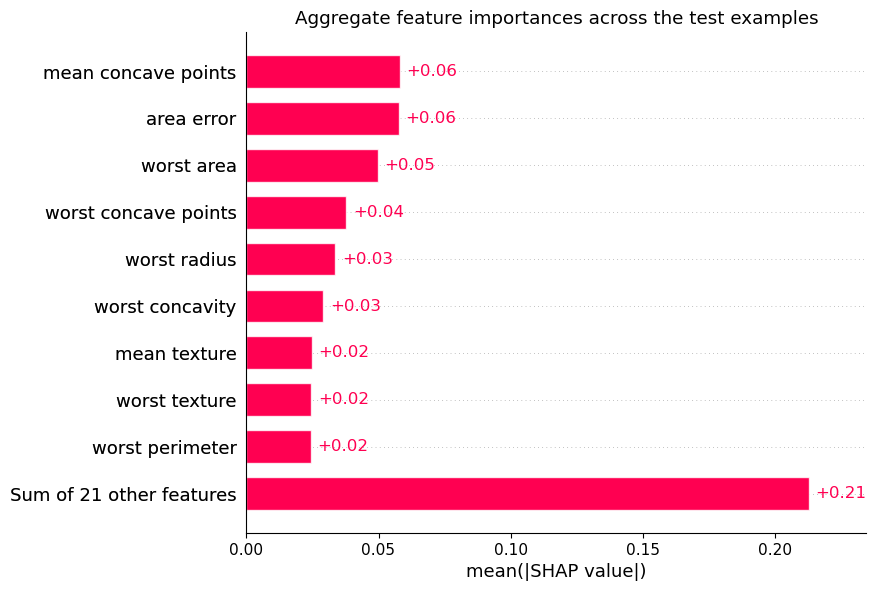

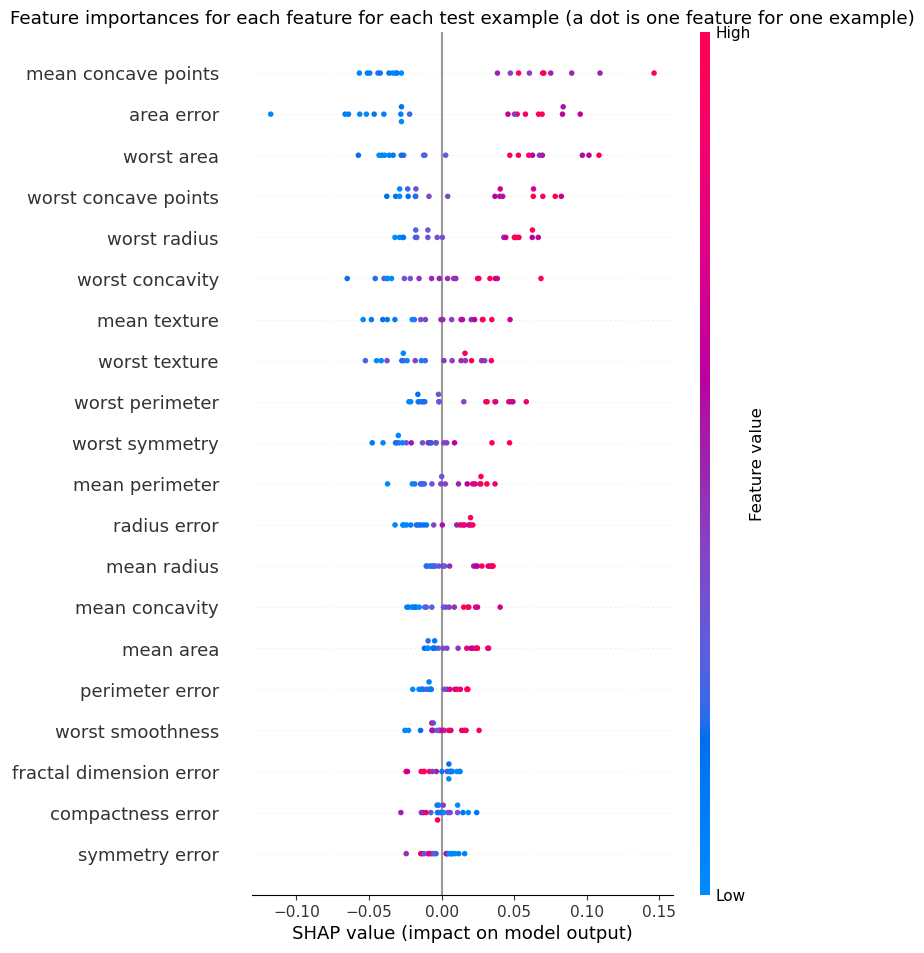

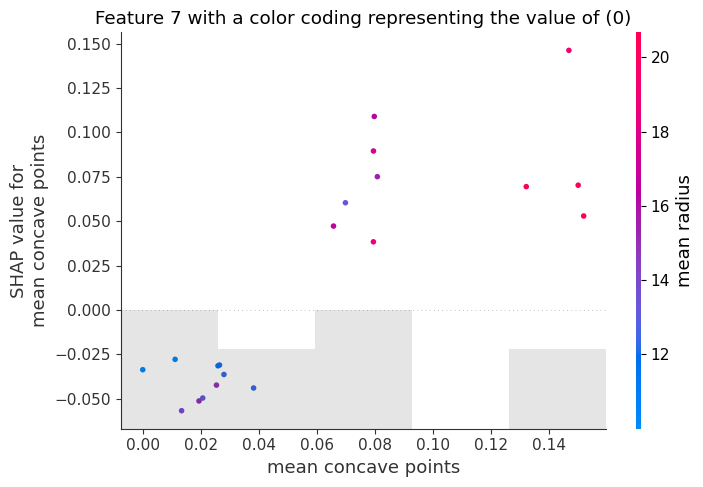


✅ SHAP-analyse fullført!
CPU times: user 7min 40s, sys: 1min 48s, total: 9min 29s
Wall time: 7min 50s


In [44]:
%%time
# SHAP-analyse med TabPFN (optimalisert for Apple Silicon)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tabpfn import TabPFNClassifier
from tabpfn_extensions import interpretability
import matplotlib.pyplot as plt

# Last inn eksempel-datasett
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = list(data.feature_names)

# Reduser antall samples for raskere kjøring
n_samples = 20  # Redusert fra 50

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Treningssett: {len(X_train)} samples")
print(f"Testsett: {len(X_test)} samples")
print(f"SHAP beregnes for: {n_samples} samples")
print(f"Device: {DEVICE}")

# Initialiser og tren modell med riktig device
clf = TabPFNClassifier(device=DEVICE, random_state=42)
clf.fit(X_train, y_train)

# Beregn SHAP-verdier
# Tips: Bruk færre samples for raskere resultat
print("\nBeregner SHAP-verdier...")
print("(Permutation SHAP kan ta 1-5 minutter)")

try:
    shap_values = interpretability.shap.get_shap_values(
        estimator=clf,
        test_x=X_test[:n_samples],
        attribute_names=feature_names,
        algorithm="permutation",  # Kan byttes til "kernel" hvis tilgjengelig
    )
    
    # Opprett visualisering
    print("\nLager SHAP-plot...")
    fig = interpretability.shap.plot_shap(shap_values)
    plt.tight_layout()
    plt.show()
    
    print("\n✅ SHAP-analyse fullført!")
    
except Exception as e:
    print(f"\n⚠️ Feil ved SHAP-beregning: {e}")
    print("\nAlternativ: Bruk standard SHAP som vist i Gliom-eksempelet.")


### 📊 Tolkning av SHAP-resultatene (Breast Cancer-datasettet)

Figuren ovenfor viser tre typer SHAP-visualiseringer som forklarer TabPFN-modellens prediksjoner for brystkreftklassifikasjon (ondartet vs. godartet).

---

#### 1️⃣ Aggregert variabelviktighet (øverste plot)

| Variabel | SHAP-verdi | Klinisk betydning |
|----------|------------|-------------------|
| **mean concave points** | +0.06 | Antall konkave (innbuede) punkter i cellekontur |
| **area error** | +0.06 | Variasjon i celleareal |
| **worst area** | +0.05 | Største observerte celleareal |
| **worst concave points** | +0.04 | Maksimalt antall konkave punkter |
| **worst radius** | +0.03 | Største celleradius |

> 💡 **Hovedfunn:** Cellenes **form** (concave points) og **størrelse** (area, radius) er de viktigste prediktorene. Dette samsvarer med patologisk kunnskap: ondartede celler har ofte uregelmessig form og er større.

---

#### 2️⃣ Beeswarm-plot (midterste plot)

**Hvordan lese plottet:**
- Hver **prikk** = én pasient
- **X-aksen** = SHAP-verdi (positiv = øker sannsynlighet for ondartet)
- **Farge:** 🔴 Rød = høy verdi | 🔵 Blå = lav verdi

**Observasjoner:**
| Variabel | Mønster | Tolkning |
|----------|---------|----------|
| **mean concave points** | Røde prikker til høyre | Høy verdi → predikerer ondartet |
| **worst area** | Røde prikker til høyre | Store celler → predikerer ondartet |
| **mean concavity** | Blå prikker til venstre | Lav konkavitet → predikerer godartet |

> 🔬 **Klinisk innsikt:** Plottet viser at modellen har lært biologisk meningsfulle mønstre – ondartede svulster har typisk større, mer uregelmessige celler.

---

#### 3️⃣ Dependence-plot (nederste plot)

Viser sammenhengen mellom **mean concave points** og dens SHAP-verdi:

- **X-aksen:** Faktisk verdi av "mean concave points"
- **Y-aksen:** SHAP-bidrag til prediksjonen
- **Farge:** Interaksjon med "mean radius"

**Tolkning:**
- Når `mean concave points` > ~0.05: SHAP-verdien blir positiv → øker sannsynlighet for ondartet
- Når `mean concave points` < ~0.03: SHAP-verdien er negativ → predikerer godartet
- Fargen viser at større celler (høy radius, rød) forsterker effekten

---

#### 🏥 Klinisk relevans

| Aspekt | Betydning |
|--------|-----------|
| **Validering** | Modellen vektlegger kjente diagnostiske markører |
| **Transparens** | SHAP gjør "black box" modellen tolkbar |
| **Tillit** | Leger kan verifisere at modellen bruker fornuftige kriterier |

> ⚠️ **Viktig:** Dette er et demonstrasjonsdatasett. Faktisk kreftdiagnostikk krever histopatologisk undersøkelse og klinisk vurdering.

---


---

# 🔮 Diskusjon: Perspektiver og fremtid

Nå som vi har sett TabPFN i aksjon på flere medisinske datasett, la oss reflektere over de bredere implikasjonene.

## Sammendrag av resultater

| Datasett | Oppgave | TabPFN ROC AUC | Kommentar |
|----------|---------|----------------|-----------|
| **DARWIN** | Alzheimer vs. frisk | ~0.85 | Håndskriftanalyse som biomarkør |
| **Glioma** | LGG vs. GBM | ~0.93 | Genetiske markører for tumorgradering |
| **Bonn EEG** | Normal vs. anfall | ~1.00 | Epilepsideteksjon fra hjernesignaler |

> 💡 **Hovedfunn:** TabPFN oppnår konkurransedyktig ytelse på tvers av svært forskjellige medisinske domener – ofte uten hyperparameter-tuning.

---


## 💰 Kostnadseffektivitet og tilgjengelighet

### Sammenligning av diagnostiske tilnærminger

| Metode | Kostnad | Tilgjengelighet | Evidensgrunnlag | Egnet for |
|--------|---------|-----------------|-----------------|-----------|
| **MR/CT hjerne** | Høy (5000-15000 NOK) | Sykehus | Sterk | Strukturelle endringer |
| **PET-amyloid** | Svært høy (>20000 NOK) | Universitetssykehus | Sterk | Tidlig Alzheimer |
| **Spinalvæskeprøve** | Moderat | Sykehus | Sterk | Biomarkører |
| **EEG** | Moderat | Bred | Sterk for epilepsi | Funksjonelle forstyrrelser |
| **Genetisk testing** | Varierer | Økende | Sterk for gliom | Tumorklassifikasjon |
| **Håndskriftanalyse** | Lav | Svært bred | **Begrenset** | Screening (eksperimentell) |

### ⚠️ Viktig presisering om håndskriftanalyse

Håndskriftanalyse for demensdiagnostikk er **et aktivt forskningsfelt**, men har foreløpig begrenset klinisk evidens:

| Tilstand | Håndskriftendringer | Evidensgrunnlag |
|----------|---------------------|-----------------|
| **Parkinsons sykdom** | Mikrografi (liten skrift), tremor | **Godt dokumentert** – anerkjent klinisk tegn |
| **Alzheimers sykdom** | Redusert hastighet, pauser | **Lovende men begrenset** – fortsatt forskning |
| **Mild kognitiv svikt** | Subtile endringer | **Eksperimentelt** – ikke klinisk validert |

> 🔬 **Forskningsstatus:** DARWIN-datasettet representerer *et viktig forskningsbidrag*, men håndskriftanalyse er foreløpig **ikke en etablert diagnostisk metode** for Alzheimers sykdom i klinisk praksis.

**Referanser:**
- Rosenblum et al. (2013): *Handwriting as an objective marker of Parkinson's disease.* J Neurol, 260(4), 1042-1053.
- Impedovo & Pirlo (2019): *Dynamic handwriting analysis for Alzheimer's disease.* Pattern Recognition Letters, 121, 68-76.
- Werner et al. (2006): *Handwriting features as predictors of mild cognitive impairment.* Computers in Biology and Medicine, 36(7), 770-787.

### Når er de ulike metodene mest relevante?

| Klinisk situasjon | Anbefalt tilnærming |
|-------------------|---------------------|
| Mistanke om hjernesvulst | MR + genetisk profil (gliom-markører) |
| Mistanke om epilepsi | EEG (standard + evt. langvarig) |
| Mistanke om demens | Kognitive tester + MR + evt. biomarkører |
| Parkinson-diagnostikk | Klinisk undersøkelse (inkl. håndskrift) + DaTscan |
| Screening i stor skala | **Fremtidig potensiale** for digitale biomarkører |

---


## ⚠️ Utfordringer i en digital verden

### Problemet: Færre skriver for hånd

I 2025 ser vi en klar trend: **færre og færre skriver med penn og papir**. Dette reiser viktige spørsmål for håndskriftbasert diagnostikk:

| Aldersgruppe | Daglig håndskrift | Foretrukket input |
|--------------|-------------------|-------------------|
| 70+ | Høy | Penn/papir |
| 50-70 | Moderat | Blanding |
| 30-50 | Lav | Tastatur |
| Under 30 | Svært lav | Tastatur/tale |

### Konsekvenser

1. **Generasjonsforskjeller i baseline**
   - Yngre generasjoner har mindre øvd håndskrift
   - «Normal» håndskrift i 2050 vil se annerledes ut enn i 2020
   - Modeller trent på dagens data kan miste validitet

2. **Endret motorisk repertoar**
   - Barn lærer å skrive på nettbrett før penn
   - Tommelbevegelser (mobil) erstatter pennegrep
   - Nye motoriske mønstre = nye baseline-verdier

3. **Tale-til-tekst revolusjon**
   - Siri, Alexa, diktering erstatter skriving
   - Kan vi bruke **stemmeanalyse** i stedet?


## 🚀 Fremtidsperspektiver: AI i nevrologisk diagnostikk

### For hvert domene vi har utforsket

#### 🧠 Demensdiagnostikk (DARWIN-inspirert)

| Utvikling | Potensiale | Utfordringer |
|-----------|-----------|--------------|
| **Digitale skrivetabletter** | Standardisert datainnsamling | Krever infrastruktur |
| **Multimodale biomarkører** | Kombinere flere signaler | Kompleks integrasjon |
| **Longitudinell monitorering** | Tidlig oppdagelse av endring | Personvern, compliance |
| **Smarttelefon-basert** | Bred tilgjengelighet | Validering mangler |

> 💡 **Klinisk visjon:** I fremtiden kan digitale biomarkører (håndskrift, tale, bevegelse) supplere tradisjonell diagnostikk – men som *screening*, ikke erstatning.

#### 🧬 Presisjonsdiagnostikk for gliomer

| Utvikling | Potensiale | Status |
|-----------|-----------|--------|
| **AI-assistert patologi** | Raskere, mer konsistent gradering | I klinisk utprøving |
| **Radiomics** | Bildediagnostisk tumorkarakterisering | Lovende resultater |
| **Liquid biopsy** | Ikke-invasiv molekylær profilering | Under utvikling |
| **Prediktiv modellering** | Individualisert behandlingsvalg | Forskning |

> 🎯 **TabPFN-relevans:** Modeller som TabPFN kan effektivt kombinere kliniske og molekylære data for mer nøyaktig prognostisering.

#### ⚡ Epilepsi og EEG-analyse

| Utvikling | Potensiale | Status |
|-----------|-----------|--------|
| **Automatisk anfallsdeteksjon** | Real-time overvåking | Kommersielt tilgjengelig |
| **Prediktiv anfallsvarsling** | Livskvalitet for pasienter | Under utvikling |
| **Wearable EEG** | Kontinuerlig monitorering | Teknisk utfordrende |
| **AI-assistert tolkning** | Redusere arbeidsbelastning | I klinisk utprøving |

> 📊 **Fra DARWIN til EEG:** Den samme tilnærmingen – konvertere komplekse signaler til tolkbare features – kan anvendes på tvers av nevrologiske domener.

---


## ⚖️ Etiske betraktninger

AI-basert diagnostikk reiser viktige etiske spørsmål som varierer med anvendelsesområde:

### Generelle etiske prinsipper

| Prinsipp | Beskrivelse | Anvendelse |
|----------|-------------|------------|
| **Autonomi** | Pasientens rett til informert samtykke | Forståelig kommunikasjon av AI-resultater |
| **Beneficence** | Gjøre godt, unngå skade | Validering før klinisk bruk |
| **Non-maleficence** | Ikke skade | Håndtering av falske positive/negative |
| **Rettferdighet** | Lik tilgang | Unngå sosial skjevhet i algoritmer |

### Domenespesifikke bekymringer

#### 🧠 Demens og håndskriftanalyse

| Bekymring | Beskrivelse |
|-----------|-------------|
| **Tidlig diagnose** | Kan føre til angst uten behandlingsmuligheter |
| **Stigma** | Bekymring for diskriminering (forsikring, arbeid) |
| **Falske positive** | Friske personer som får demensdiagnose |
| **Personvern** | Sensitive helsedata fra hverdagsaktiviteter |

#### 🧬 Genetisk testing for gliomer

| Bekymring | Beskrivelse |
|-----------|-------------|
| **Prognostisk informasjon** | Pasienter må informeres om implikasjoner |
| **Familiemedlemmer** | Genetisk informasjon kan angå flere |
| **Behandlingsvalg** | Balanse mellom aggressiv og palliativ behandling |

#### ⚡ Automatisk EEG-analyse

| Bekymring | Beskrivelse |
|-----------|-------------|
| **Ansvar** | Hvem er ansvarlig ved feil diagnose? |
| **Over-reliance** | Risiko for at klinikere stoler blindt på AI |
| **Tilgang** | Ulik tilgang til avansert teknologi |

### Ansvar og transparens

> ❓ **Viktige spørsmål:**
> - Hvem er ansvarlig når en AI-modell gir feil diagnose?
> - Hvordan sikrer vi at pasienter forstår at AI er involvert?
> - Hvordan unngår vi at AI forsterker eksisterende helseforskjeller?

### Regulatoriske rammeverk

| Region | Rammeverk | Status |
|--------|-----------|--------|
| **EU** | AI Act, MDR | Under implementering |
| **USA** | FDA-godkjenning for SaMD | Etablert |
| **Norge** | Helsenorge-retningslinjer | Under utvikling |

> 🏥 **Klinisk praksis:** AI-verktøy bør alltid betraktes som *beslutningsstøtte*, ikke erstatning for klinisk skjønn. Den endelige diagnosen er alltid legens ansvar.

---


## 📝 Oppsummering og refleksjonsspørsmål

### Hva vi har lært

I denne notebooken har vi utforsket **TabPFN** som verktøy for medisinsk klassifikasjon på tre ulike nevrologiske datasett:

| Datasett | Oppgave | Nøkkelfunn |
|----------|---------|------------|
| **DARWIN** | Alzheimer fra håndskrift | Lovende forskning, men begrenset klinisk evidens |
| **Glioma** | Tumorgradering fra genetikk | Sterk ytelse, klinisk relevant |
| **Bonn EEG** | Epilepsideteksjon | Utmerket ytelse, etablert domene |

### Hovedpoenger

1. **TabPFN** kan oppnå konkurransedyktig ytelse på medisinske data – ofte uten hyperparameter-tuning
2. **Ulik modenhet:** De tre domenene har svært ulik grad av klinisk validering
3. **Etikk og validering** må alltid vurderes før klinisk implementering
4. **AI som støtteverktøy:** Aldri erstatning for klinisk skjønn

### Refleksjonsspørsmål for diskusjon

#### Klinisk relevans
1. **Hvilke av de tre metodene (håndskrift, genetikk, EEG) tror du har størst potensiale for klinisk implementering i nær fremtid? Begrunn svaret.**

2. **Hva er de viktigste forskjellene mellom å bruke AI for screening vs. diagnostikk? Gi eksempler fra notebooken.**

#### Metodologiske spørsmål
3. **Hvorfor oppnår TabPFN bedre ytelse på EEG-dataene enn på DARWIN? Reflekter over datasettenes egenskaper.**

4. **SHAP-analysen viser hvilke variabler som er viktige for modellen. Hvordan kan dette bidra til medisinsk forståelse – og hva er begrensningene?**

#### Etikk og samfunn
5. **En AI-modell predikerer med 85% nøyaktighet at en person vil utvikle demens om 5 år. Bør personen informeres? Diskuter fordeler og ulemper.**

6. **Hvordan kan digitale biomarkører (som håndskrift) bidra til helseforskjeller mellom grupper? Tenk på alder, utdanning, kulturell bakgrunn.**

#### Fremtidsperspektiv
7. **Forestill deg at du er medisinsk rådgiver for et helseteknologi-selskap. Hvilke krav ville du stille før et AI-verktøy for demensscreening ble tatt i bruk?**

8. **Sammenlign håndskriftanalyse for Parkinsons sykdom (veletablert) med Alzheimers (eksperimentell). Hva kan forklare denne forskjellen?**

---

### Videre lesning

**TabPFN:**
- [TabPFN dokumentasjon](https://docs.priorlabs.ai/)
- Hollmann et al. (2023): *TabPFN: A Transformer That Solves Small Tabular Classification Problems in a Second*

**Håndskrift og nevrodegenerasjon:**
- Rosenblum et al. (2013): *Handwriting as an objective marker of Parkinson's disease.* J Neurol.
- Cilia et al. (2022): *Diagnosing Alzheimer's disease from handwriting.* Engineering Applications of AI.

**Medisinsk AI:**
- Topol (2019): *Deep Medicine: How AI Can Make Healthcare Human Again.* Basic Books.
- Rajkomar et al. (2019): *Machine Learning in Medicine.* NEJM.

---

*Takk for at du fullførte denne notebooken! 🎓*
